# **Impacto de las Condiciones Preexistentes y Factores de Riesgo en la Mortalidad y Hospitalización de Pacientes con COVID-19**

El objetivo general de este proyecto es investigar cómo las condiciones de salud preexistentes influyen en la probabilidad de mortalidad y contagio en pacientes con COVID-19 y qué factores de riesgo están asociados a la hospitalización. Esto permitirá identificar patrones y factores críticos que pueden guiar las políticas de salud pública y las estrategias de intervención.



## **Descripción del Dataset**

El dataset fue proporcionado por el gobierno mexicano ([enlace](link)). Contiene una gran cantidad de información anonimizada sobre pacientes, incluyendo condiciones preexistentes. El dataset crudo consta de **21 características únicas** y **1,048,576 pacientes únicos**.

En las características Booleanas:
- **1** significa "sí".
- **2** significa "no".
- Los valores **97**,**98** y **99** representan datos faltantes.

### **Descripción de las columnas contenidas en el archivo csv:**

- **sex**: Género del paciente. 1 para femenino y 2 para masculino.
- **age**: Edad del paciente.
- **classification**: Resultados de la prueba de COVID. Los valores 1-3 indican que el paciente fue diagnosticado con COVID en diferentes grados. Un valor de 4 o superior indica que el paciente no es portador de COVID o que la prueba fue inconclusa.
- **patient type**: Tipo de atención recibida por el paciente. 1 significa que fue dado de alta a su casa, y 2 indica que fue hospitalizado.
- **pneumonia**: Indica si el paciente ya tiene inflamación de los sacos de aire.
- **pregnancy**: Indica si el paciente está embarazada o no.
- **diabetes**: Indica si el paciente tiene diabetes.
- **copd**: Indica si el paciente tiene Enfermedad Pulmonar Obstructiva Crónica (EPOC).
- **asthma**: Indica si el paciente tiene asma.
- **inmsupr**: Indica si el paciente está inmunosuprimido.
- **hypertension**: Indica si el paciente tiene hipertensión.
- **cardiovascular**: Indica si el paciente tiene una enfermedad relacionada con el corazón o los vasos sanguíneos.
- **renal chronic**: Indica si el paciente tiene una enfermedad renal crónica.
- **other disease**: Indica si el paciente tiene alguna otra enfermedad.
- **obesity**: Indica si el paciente tiene obesidad.
- **tobacco**: Indica si el paciente es usuario de tabaco.
- **usmr**: Indica si el paciente fue tratado en unidades médicas de primer, segundo o tercer nivel.
- **medical unit**: Tipo de institución del Sistema Nacional de Salud que brindó la atención.
- **intubed**: Indica si el paciente fue conectado a un ventilador.
- **icu**: Indica si el paciente fue admitido en una Unidad de Cuidados Intensivos (UCI).
- **date died**: Si el paciente falleció, indica la fecha de defunción; de lo contrario, aparece el valor **9999-99-99**.

#**Limpieza, organización y estandarización de los datos**

In [ ]:
#Importar librerias necesarias
from IPython.display import display,Markdown # Para mostrar múltiples resultados en una sola celda.
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Conectamos con google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Generamos una variable con la ruta parcial.
dataset= "/content/drive/MyDrive/datasetpro/"
# Declaracion de variables generales.
df = pd.DataFrame()
df_1= pd.DataFrame()

In [ ]:
try:
  # Cargamos el archivo, para su principal lectura y procesamiento de datos.
  df = pd.read_csv(dataset + 'Covid Data.csv')
  display(df)
except Exception as e:
  print("Algo ocurrio con la lectura del archivo verifica la ruta")
  print(f'Error: {e}')
else:
  print("Lectura finalizada")

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  \
0            2             1    1             1  03/05/2020       97   
1            2             1    2             1  03/06/2020       97   
2            2             1    2             2  09/06/2020        1   
3            2             1    1             1  12/06/2020       97   
4            2             1    2             1  21/06/2020       97   
...        ...           ...  ...           ...         ...      ...   
1048570      2            13    2             1  9999-99-99       97   
1048571      1            13    2             2  9999-99-99        2   
1048572      2            13    2             1  9999-99-99       97   
1048573      2            13    2             1  9999-99-99       97   
1048574      2            13    2             1  9999-99-99       97   

         PNEUMONIA  AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  \
0                1   65         2         2  ...       2        2   
1                1   72        97         2  ...       2        2   
2                2   55        97         1  ...       2        2   
3                2   53         2         2  ...       2        2   
4                2   68        97         1  ...       2        2   
...            ...  ...       ...       ...  ...     ...      ...   
1048570          2   40        97         2  ...       2        2   
1048571          2   51        97         2  ...       2        2   
1048572          2   55        97         2  ...       2        2   
1048573          2   28        97         2  ...       2        2   
1048574          2   52        97         2  ...       2        2   

         HIPERTENSION  OTHER_DISEASE  CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  \
0                   1              2               2        2              2   
1                   1              2               2        1              1   
2                   2              2               2        2              2   
3                   2              2               2        2              2   
4                   1              2               2        2              2   
...               ...            ...             ...      ...            ...   
1048570             2              2               2        2              2   
1048571             1              2               2        2              2   
1048572             2              2               2        2              2   
1048573             2              2               2        2              2   
1048574             2              2               2        2              2   

         TOBACCO  CLASIFFICATION_FINAL  ICU  
0              2                     3   97  
1              2                     5   97  
2              2                     3    2  
3              2                     7   97  
4              2                     3   97  
...          ...                   ...  ...  
1048570        2                     7   97  
1048571        2                     7    2  
1048572        2                     7   97  
1048573        2                     7   97  
1048574        2                     7   97  

[1048575 rows x 21 columns]

Lectura finalizada


In [ ]:
def resumen_dataframe(df):
    """
    Muestra un resumen general del DataFrame incluyendo la cantidad de filas y columnas,
    cantidad y porcentaje de datos nulos, valores únicos y tipos de datos por columna.

    Parámetros:
    df (DataFrame): El DataFrame a analizar.

    Retorna:
    None
    """
    print("="*60)
    print("RESUMEN GENERAL DEL DATAFRAME")
    print("="*60)
    print(f"Dimensiones del DataFrame: {df.shape[0]} filas y {df.shape[1]} columnas")
    print("-"*60)

    print("Cantidad de datos nulos por columna:")
    nulos = df.isnull().sum()
    porcentaje_nulos = (nulos / df.shape[0]) * 100
    nulos_df = pd.DataFrame({'Nulos': nulos, 'Porcentaje (%)': porcentaje_nulos})
    print(nulos_df)
    print("-"*60)

    print("Valores únicos por columna:")
    print(df.nunique())
    print("-"*60)

    print("Tipos de datos por columna:")
    print(df.dtypes)
    print("-"*60)

# Llamada a la función con un DataFrame de ejemplo
resumen_dataframe(df)


RESUMEN GENERAL DEL DATAFRAME
Dimensiones del DataFrame: 1048575 filas y 21 columnas
------------------------------------------------------------
Cantidad de datos nulos por columna:
                      Nulos  Porcentaje (%)
USMER                     0             0.0
MEDICAL_UNIT              0             0.0
SEX                       0             0.0
PATIENT_TYPE              0             0.0
DATE_DIED                 0             0.0
INTUBED                   0             0.0
PNEUMONIA                 0             0.0
AGE                       0             0.0
PREGNANT                  0             0.0
DIABETES                  0             0.0
COPD                      0             0.0
ASTHMA                    0             0.0
INMSUPR                   0             0.0
HIPERTENSION              0             0.0
OTHER_DISEASE             0             0.0
CARDIOVASCULAR            0             0.0
OBESITY                   0             0.0
RENAL_CHRONIC            

In [ ]:
#Creamos una copia para poder recuperar la información original en dado caso de necesitarlo
df_1 = df.copy()
df_1.head()

USMER  MEDICAL_UNIT  SEX  PATIENT_TYPE   DATE_DIED  INTUBED  PNEUMONIA  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   AGE  PREGNANT  DIABETES  ...  ASTHMA  INMSUPR  HIPERTENSION  OTHER_DISEASE  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   CARDIOVASCULAR  OBESITY  RENAL_CHRONIC  TOBACCO  CLASIFFICATION_FINAL  ICU  
0               2        2              2        2                     3   97  
1               2        1              1        2                     5   97  
2               2        2              2        2                     3    2  
3               2        2              2        2                     7   97  
4               2        2              2        2                     3   97  

[5 rows x 21 columns]

In [ ]:
# Convertir nombres de columnas a snake_case
df_1.columns = df.columns.str.lower().str.replace(' ', '_')
df_1.head()

usmer  medical_unit  sex  patient_type   date_died  intubed  pneumonia  \
0      2             1    1             1  03/05/2020       97          1   
1      2             1    2             1  03/06/2020       97          1   
2      2             1    2             2  09/06/2020        1          2   
3      2             1    1             1  12/06/2020       97          2   
4      2             1    2             1  21/06/2020       97          2   

   age  pregnant  diabetes  ...  asthma  inmsupr  hipertension  other_disease  \
0   65         2         2  ...       2        2             1              2   
1   72        97         2  ...       2        2             1              2   
2   55        97         1  ...       2        2             2              2   
3   53         2         2  ...       2        2             2              2   
4   68        97         1  ...       2        2             1              2   

   cardiovascular  obesity  renal_chronic  tobacco  clasiffication_final  icu  
0               2        2              2        2                     3   97  
1               2        1              1        2                     5   97  
2               2        2              2        2                     3    2  
3               2        2              2        2                     7   97  
4               2        2              2        2                     3   97  

[5 rows x 21 columns]

Dadas las caracteristicas del Dataset pudimos notar que no habia valores NaN ya que estos se habian sustituido por valores como 97,98 y 99, esto nos podria causar ciertos problemas al hacer calculos estadisticos que podrian presentar sesgo dentro de los cálculos, por lo que procederemos a cambiar estos valores por NaN para después pasarlos a un valor 0.


In [ ]:
# Reemplazar los valores 97,98 y 99 por NaN en todas las columnas
df_1.replace([97, 98, 99], np.nan, inplace=True)

# En el análisis 0 tiene sentido para los datos faltantes
df_1.fillna(0, inplace=True)

# Reemplazar '9999-99-99' con NaT antes de convertir
df_1['date_died'].replace('9999-99-99', np.nan, inplace=True)
#Validar que los datos manejados solo sean de tipo date
df_1['date_died'] = pd.to_datetime(df_1['date_died'], errors='coerce')

datos_nulos={
    'date_died': pd.to_datetime(np.random.uniform(df_1['date_died'].min().value, df_1['date_died'].max().value)).normalize()
}

#df_1 = df_1.astype(diccionario_de_conversion)
df_1.fillna(datos_nulos,inplace=True)

#explorando el dataset
resumen_dataframe(df_1)

<ipython-input-8-4de8ea4ec5a2>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_1['date_died'].replace('9999-99-99', np.nan, inplace=True)


RESUMEN GENERAL DEL DATAFRAME
Dimensiones del DataFrame: 1048575 filas y 21 columnas
------------------------------------------------------------
Cantidad de datos nulos por columna:
                      Nulos  Porcentaje (%)
usmer                     0             0.0
medical_unit              0             0.0
sex                       0             0.0
patient_type              0             0.0
date_died                 0             0.0
intubed                   0             0.0
pneumonia                 0             0.0
age                       0             0.0
pregnant                  0             0.0
diabetes                  0             0.0
copd                      0             0.0
asthma                    0             0.0
inmsupr                   0             0.0
hipertension              0             0.0
other_disease             0             0.0
cardiovascular            0             0.0
obesity                   0             0.0
renal_chronic            

In [ ]:
# Detectar valores duplicados
df_1.drop_duplicates(inplace=True)
resumen_dataframe(df_1)

RESUMEN GENERAL DEL DATAFRAME
Dimensiones del DataFrame: 213912 filas y 21 columnas
------------------------------------------------------------
Cantidad de datos nulos por columna:
                      Nulos  Porcentaje (%)
usmer                     0             0.0
medical_unit              0             0.0
sex                       0             0.0
patient_type              0             0.0
date_died                 0             0.0
intubed                   0             0.0
pneumonia                 0             0.0
age                       0             0.0
pregnant                  0             0.0
diabetes                  0             0.0
copd                      0             0.0
asthma                    0             0.0
inmsupr                   0             0.0
hipertension              0             0.0
other_disease             0             0.0
cardiovascular            0             0.0
obesity                   0             0.0
renal_chronic             

In [ ]:
#Eliminar columnas no necesarias del DataFrame y guardarlo en una nueva variable
df_1 = df_1.drop(columns=['usmer', 'medical_unit'])
df_1.head(10)

sex  patient_type  date_died  intubed  pneumonia   age  pregnant  diabetes  \
0    1             1 2020-03-05      0.0        1.0  65.0       2.0       2.0   
1    2             1 2020-03-06      0.0        1.0  72.0       0.0       2.0   
2    2             2 2020-09-06      1.0        2.0  55.0       0.0       1.0   
3    1             1 2020-12-06      0.0        2.0  53.0       2.0       2.0   
4    2             1 2020-05-23      0.0        2.0  68.0       0.0       1.0   
5    1             2 2020-05-23      2.0        1.0  40.0       2.0       2.0   
6    1             1 2020-05-23      0.0        2.0  64.0       2.0       2.0   
7    1             1 2020-05-23      0.0        1.0  64.0       2.0       1.0   
8    1             2 2020-05-23      2.0        2.0  37.0       2.0       1.0   
9    1             2 2020-05-23      2.0        2.0  25.0       2.0       2.0   

   copd  asthma  inmsupr  hipertension  other_disease  cardiovascular  \
0   2.0     2.0      2.0           1.0            2.0             2.0   
1   2.0     2.0      2.0           1.0            2.0             2.0   
2   2.0     2.0      2.0           2.0            2.0             2.0   
3   2.0     2.0      2.0           2.0            2.0             2.0   
4   2.0     2.0      2.0           1.0            2.0             2.0   
5   2.0     2.0      2.0           2.0            2.0             2.0   
6   2.0     2.0      2.0           2.0            2.0             2.0   
7   2.0     2.0      1.0           1.0            2.0             2.0   
8   2.0     2.0      2.0           1.0            2.0             2.0   
9   2.0     2.0      2.0           2.0            2.0             2.0   

   obesity  renal_chronic  tobacco  clasiffication_final  icu  
0      2.0            2.0      2.0                     3  0.0  
1      1.0            1.0      2.0                     5  0.0  
2      2.0            2.0      2.0                     3  2.0  
3      2.0            2.0      2.0                     7  0.0  
4      2.0            2.0      2.0                     3  0.0  
5      2.0            2.0      2.0                     3  2.0  
6      2.0            2.0      2.0                     3  0.0  
7      2.0            1.0      2.0                     3  0.0  
8      1.0            2.0      2.0                     3  2.0  
9      2.0            2.0      2.0                     3  2.0

In [ ]:
df_1.columns.tolist()

['sex',
 'patient_type',
 'date_died',
 'intubed',
 'pneumonia',
 'age',
 'pregnant',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hipertension',
 'other_disease',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco',
 'clasiffication_final',
 'icu']

In [ ]:
# Mapear la variable clasificación
def map_classification(x):
  if x >= 4:
    return 'Negativo o Inconcluso'
  elif x == 1:
    return 'Positivo - Leve'
  elif x == 2:
    return 'Positivo - Moderado'
  elif x == 3:
    return 'Positivo - Grave'  # No cambia el valor 3
  return x

df_1['clasiffication_final'] = df_1['clasiffication_final'].apply(map_classification)

In [ ]:
def mapear_variables(df):
    # Mapeo para la variable 'sex'
    if df['sex'].dtype == 'int64':  # Verifica si los valores son numéricos
        df['sex'] = df['sex'].map({1: 'Femenino', 2: 'Masculino'})

    # Mapeo para la variable 'patient_type'
    if df['patient_type'].dtype == 'int64':  # Verifica si los valores son numéricos
        df['patient_type'] = df['patient_type'].map({1: 'Alta', 2: 'Hospitalizado'})

    return df

# Aplicar la función al DataFrame solo una vez
df_1 = mapear_variables(df_1)
df_1.head()


sex   patient_type  date_died  intubed  pneumonia   age  pregnant  \
0   Femenino           Alta 2020-03-05      0.0        1.0  65.0       2.0   
1  Masculino           Alta 2020-03-06      0.0        1.0  72.0       0.0   
2  Masculino  Hospitalizado 2020-09-06      1.0        2.0  55.0       0.0   
3   Femenino           Alta 2020-12-06      0.0        2.0  53.0       2.0   
4  Masculino           Alta 2020-05-23      0.0        2.0  68.0       0.0   

   diabetes  copd  asthma  inmsupr  hipertension  other_disease  \
0       2.0   2.0     2.0      2.0           1.0            2.0   
1       2.0   2.0     2.0      2.0           1.0            2.0   
2       1.0   2.0     2.0      2.0           2.0            2.0   
3       2.0   2.0     2.0      2.0           2.0            2.0   
4       1.0   2.0     2.0      2.0           1.0            2.0   

   cardiovascular  obesity  renal_chronic  tobacco   clasiffication_final  icu  
0             2.0      2.0            2.0      2.0       Positivo - Grave  0.0  
1             2.0      1.0            1.0      2.0  Negativo o Inconcluso  0.0  
2             2.0      2.0            2.0      2.0       Positivo - Grave  2.0  
3             2.0      2.0            2.0      2.0  Negativo o Inconcluso  0.0  
4             2.0      2.0            2.0      2.0       Positivo - Grave  0.0

In [ ]:
def mapeo_int(df):
# Mapeo para las variables binarias (1 = Si, 2 = No)
  binarias = ['intubed','pneumonia','pregnant','diabetes','copd','asthma','inmsupr','hipertension',
                  'other_disease','cardiovascular','obesity','renal_chronic','tobacco']

  for col in binarias:
      df[col] = pd.to_numeric(df[col], errors='coerce')  # Convierte a numérico, reemplaza errores con NaN
      df[col] = df[col].fillna(0).astype(int)  # Reemplaza NaN con 0 y convierte a int
      df[col] = df[col].map({0: 'Desconocido', 1: 'Sí', 2: 'No'})

  return df
  # Aplicar la función al DataFrame
df_1 = mapeo_int(df_1)
df_1.head()

sex   patient_type  date_died      intubed pneumonia   age  \
0   Femenino           Alta 2020-03-05  Desconocido        Sí  65.0   
1  Masculino           Alta 2020-03-06  Desconocido        Sí  72.0   
2  Masculino  Hospitalizado 2020-09-06           Sí        No  55.0   
3   Femenino           Alta 2020-12-06  Desconocido        No  53.0   
4  Masculino           Alta 2020-05-23  Desconocido        No  68.0   

      pregnant diabetes copd asthma inmsupr hipertension other_disease  \
0           No       No   No     No      No           Sí            No   
1  Desconocido       No   No     No      No           Sí            No   
2  Desconocido       Sí   No     No      No           No            No   
3           No       No   No     No      No           No            No   
4  Desconocido       Sí   No     No      No           Sí            No   

  cardiovascular obesity renal_chronic tobacco   clasiffication_final  icu  
0             No      No            No      No       Positivo - Grave  0.0  
1             No      Sí            Sí      No  Negativo o Inconcluso  0.0  
2             No      No            No      No       Positivo - Grave  2.0  
3             No      No            No      No  Negativo o Inconcluso  0.0  
4             No      No            No      No       Positivo - Grave  0.0

In [ ]:
resumen_dataframe(df_1)

RESUMEN GENERAL DEL DATAFRAME
Dimensiones del DataFrame: 213912 filas y 19 columnas
------------------------------------------------------------
Cantidad de datos nulos por columna:
                      Nulos  Porcentaje (%)
sex                       0             0.0
patient_type              0             0.0
date_died                 0             0.0
intubed                   0             0.0
pneumonia                 0             0.0
age                       0             0.0
pregnant                  0             0.0
diabetes                  0             0.0
copd                      0             0.0
asthma                    0             0.0
inmsupr                   0             0.0
hipertension              0             0.0
other_disease             0             0.0
cardiovascular            0             0.0
obesity                   0             0.0
renal_chronic             0             0.0
tobacco                   0             0.0
clasiffication_final      

# Análisis Exploratorio de los Datos

In [ ]:
#funcion que calcula las estadisticas de las columnas.
def calcular_estadisticas(df, columna):
    print(f"Estadísticas de la columna {columna}:")
    print(f"Media: {df[columna].mean()}")
    print(f"Desviación estándar: {df[columna].std()}")
    print(f"Mínimo: {df[columna].min()}")
    print(f"Máximo: {df[columna].max()}")

calcular_estadisticas(df_1, 'age')


Estadísticas de la columna age:
Media: 51.78696847301694
Desviación estándar: 19.631039313497844
Mínimo: 0.0
Máximo: 121.0


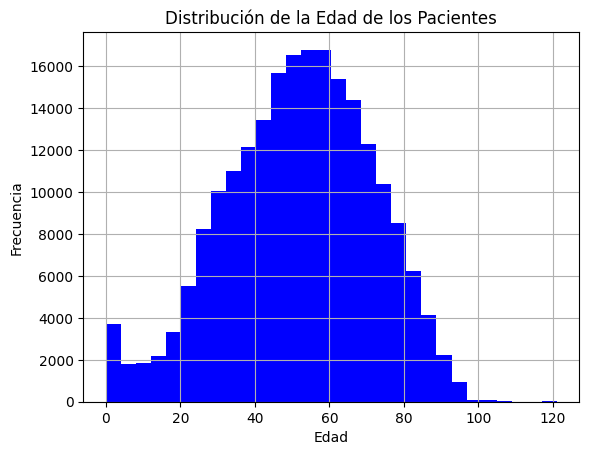

In [ ]:
import matplotlib.pyplot as plt

# Histograma de la distribución de la edad
df_1['age'].hist(bins=30, color='blue')
plt.title('Distribución de la Edad de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
# Agrupar por género y contar el número de pacientes en cada grupo
conteo_genero = df_1.groupby('sex').size().reset_index(name='Conteo')

# Calcular la proporción de cada género
proporcion_genero = (df_1.groupby('sex').size() / len(df_1) * 100).reset_index(name='Proporción (%)')

# Unir ambos resultados en un solo DataFrame
resultado_genero = pd.merge(conteo_genero, proporcion_genero, on='sex')

# Renombrar la columna 'sex' a 'Género'
resultado_genero = resultado_genero.rename(columns={'sex': 'Sexo'})

# Mostrar el DataFrame con display()
display(resultado_genero)

Sexo  Conteo  Proporción (%)
0   Femenino   99765       46.638337
1  Masculino  114147       53.361663

In [ ]:
# Contar cuántos pacientes hay en cada grado de COVID (Positivo - Leve, Moderado, Grave)
covid_counts = df_1['clasiffication_final'].value_counts()

# Filtrar solo los diagnósticos de COVID (grados 1-3)
diagnosticos_covid = covid_counts[['Positivo - Leve', 'Positivo - Moderado', 'Positivo - Grave']]
# Convertir el conteo a un DataFrame para mejor presentación
diagnosticos_covid_df = pd.DataFrame(diagnosticos_covid).reset_index()
diagnosticos_covid_df.columns = ['Diagnóstico', 'Cantidad de Pacientes']


# Mostrar el DataFrame
display(diagnosticos_covid_df)


Diagnóstico  Cantidad de Pacientes
0      Positivo - Leve                   4672
1  Positivo - Moderado                   1787
2     Positivo - Grave                  89483

In [ ]:
# Contar pacientes dados de alta y hospitalizados según su clasificación de COVID
clasificacion_pacientes = df_1.groupby(['patient_type', 'clasiffication_final']).size().reset_index(name='Cantidad de Pacientes')

# Renombrar columnas para mejor comprensión
clasificacion_pacientes.columns = ['Tipo de Atención', 'Clasificación de COVID', 'Cantidad de Pacientes']

# Mostrar el DataFrame con display
display(clasificacion_pacientes)


Tipo de Atención Clasificación de COVID  Cantidad de Pacientes
0             Alta  Negativo o Inconcluso                  62470
1             Alta       Positivo - Grave                  32112
2             Alta        Positivo - Leve                   2789
3             Alta    Positivo - Moderado                    166
4    Hospitalizado  Negativo o Inconcluso                  55500
5    Hospitalizado       Positivo - Grave                  57371
6    Hospitalizado        Positivo - Leve                   1883
7    Hospitalizado    Positivo - Moderado                   1621

In [ ]:
# Contar cuántos pacientes fueron hospitalizados y cuántos fueron enviados a casa
atencion_counts = df_1['patient_type'].value_counts()
atencion_counts_df = pd.DataFrame(atencion_counts).reset_index()
atencion_counts_df.columns = ['Tipo de Atención', 'Cantidad de Pacientes']

# Mostrar el DataFrame
display(atencion_counts_df)

Tipo de Atención  Cantidad de Pacientes
0    Hospitalizado                 116375
1             Alta                  97537

In [ ]:
# Filtrar los pacientes diagnosticados con COVID (Positivo - Leve, Moderado, Grave)
covid_diagnosticados = df_1[df_1['clasiffication_final'].isin(['Positivo - Leve', 'Positivo - Moderado', 'Positivo - Grave'])]

# Calcular la cantidad de pacientes con neumonía dentro del grupo de diagnosticados con COVID
pacientes_con_neumonia = covid_diagnosticados[covid_diagnosticados['pneumonia'] == 'Si'].shape[0]

# Calcular el total de pacientes diagnosticados con COVID
total_covid_diagnosticados = covid_diagnosticados.shape[0]

# Calcular el porcentaje
porcentaje_con_neumonia = (pacientes_con_neumonia / total_covid_diagnosticados) * 100

# Mostrar el resultado
print(f"Porcentaje de pacientes diagnosticados con COVID que ya tenían neumonía: {porcentaje_con_neumonia:.2f}%")


Porcentaje de pacientes diagnosticados con COVID que ya tenían neumonía: 0.00%


In [ ]:
# Calcular el número total de pacientes en el dataset
total_pacientes = df_1.shape[0]

# Calcular el número de pacientes embarazadas (asumiendo que 'Sí' indica embarazo)
pacientes_embarazadas = df_1[df_1['pregnant'] == 'Sí'].shape[0]

# Calcular el porcentaje de pacientes embarazadas
porcentaje_embarazadas = (pacientes_embarazadas / total_pacientes) * 100

# Mostrar el resultado utilizando display() para una mejor visualización
print(f"Porcentaje de pacientes embarazadas en el dataset: {porcentaje_embarazadas:.2f}%")


Porcentaje de pacientes embarazadas en el dataset: 0.00%


Agregaremos un nuevo  dataset que nos permita entender como es que se vieron afectados diferentes países por COVID-19.

In [ ]:
try:
  # Cargamos el archivo, para su principal lectura y procesamiento de datos.
  df2 = pd.read_csv(dataset + 'corona_virus.csv')
  display(df2)
except Exception as e:
  print("Algo ocurrio con la lectura del archivo verifica la ruta")
  print(f'Error: {e}')
else:
  print("Lectura finalizada")


Country,Other   Total Cases New Cases Total Deaths  New Deaths  \
0               USA  10,66,27,427       NaN    11,59,824         NaN   
1             India   4,49,39,515       NaN     5,31,508         NaN   
2            France   3,99,80,570       NaN     1,66,556         NaN   
3           Germany   3,84,03,667       NaN     1,73,044         NaN   
4            Brazil   3,74,49,418       NaN     7,01,494         NaN   
..              ...           ...       ...          ...         ...   
227    Vatican City            29       NaN          NaN         NaN   
228  Western Sahara            10       NaN            1         NaN   
229      MS Zaandam             9       NaN            2         NaN   
230         Tokelau             5       NaN          NaN         NaN   
231          Total:  68,70,21,745    14,511    68,63,517         3.0   

    Total Recovered New Recovered Active Cases Serious,Critical  \
0      10,45,49,551           NaN     9,18,052            1,368   
1       4,43,56,693           NaN       51,314              NaN   
2       3,96,77,000           NaN     1,37,014              869   
3       3,81,92,900           600       37,723              NaN   
4       3,62,49,161           NaN     4,98,763              NaN   
..              ...           ...          ...              ...   
227              29           NaN            0              NaN   
228               9           NaN            0              NaN   
229               7           NaN            0              NaN   
230             NaN           NaN            5              NaN   
231    65,95,52,126        20,724  2,06,06,102           39,292   

    Tot Cases/1M pop Deaths/1M pop     Total Tests Tests/1M pop  \
0           3,18,476         3,464  1,17,68,34,935    35,14,983   
1             31,948           378    92,64,96,579     6,58,663   
2           6,09,604         2,540    27,14,90,188    41,39,547   
3           4,57,821         2,063    12,23,32,384    14,58,359   
4           1,73,897         3,257     6,37,76,166     2,96,146   
..               ...           ...             ...          ...   
227           36,295           NaN             NaN          NaN   
228               16             2             NaN          NaN   
229              NaN           NaN             NaN          NaN   
230            3,628           NaN             NaN          NaN   
231        88,138.50         880.5             NaN          NaN   

         Population  
0      33,48,05,269  
1    1,40,66,31,776  
2       6,55,84,518  
3       8,38,83,596  
4      21,53,53,593  
..              ...  
227             799  
228        6,26,161  
229             NaN  
230           1,378  
231             NaN  

[232 rows x 14 columns]

Lectura finalizada


In [ ]:
resumen_dataframe(df2)

RESUMEN GENERAL DEL DATAFRAME
Dimensiones del DataFrame: 232 filas y 14 columnas
------------------------------------------------------------
Cantidad de datos nulos por columna:
                  Nulos  Porcentaje (%)
Country,Other         0        0.000000
Total Cases           0        0.000000
New Cases           227       97.844828
Total Deaths          6        2.586207
New Deaths          230       99.137931
Total Recovered      21        9.051724
New Recovered       220       94.827586
Active Cases         19        8.189655
Serious,Critical    105       45.258621
Tot Cases/1M pop      2        0.862069
Deaths/1M pop         8        3.448276
Total Tests          19        8.189655
Tests/1M pop         19        8.189655
Population            3        1.293103
------------------------------------------------------------
Valores únicos por columna:
Country,Other       232
Total Cases         232
New Cases             5
Total Deaths        211
New Deaths            1
Total Recove

Lo primero que haremos es crear una copia de nuestro archivo para poder tener un respaldo de la información original

In [ ]:
df2_copy = df2.copy()
df2_copy.head()

Country,Other   Total Cases New Cases Total Deaths  New Deaths  \
0           USA  10,66,27,427       NaN    11,59,824         NaN   
1         India   4,49,39,515       NaN     5,31,508         NaN   
2        France   3,99,80,570       NaN     1,66,556         NaN   
3       Germany   3,84,03,667       NaN     1,73,044         NaN   
4        Brazil   3,74,49,418       NaN     7,01,494         NaN   

  Total Recovered New Recovered Active Cases Serious,Critical  \
0    10,45,49,551           NaN     9,18,052            1,368   
1     4,43,56,693           NaN       51,314              NaN   
2     3,96,77,000           NaN     1,37,014              869   
3     3,81,92,900           600       37,723              NaN   
4     3,62,49,161           NaN     4,98,763              NaN   

  Tot Cases/1M pop Deaths/1M pop     Total Tests Tests/1M pop      Population  
0         3,18,476         3,464  1,17,68,34,935    35,14,983    33,48,05,269  
1           31,948           378    92,64,96,579     6,58,663  1,40,66,31,776  
2         6,09,604         2,540    27,14,90,188    41,39,547     6,55,84,518  
3         4,57,821         2,063    12,23,32,384    14,58,359     8,38,83,596  
4         1,73,897         3,257     6,37,76,166     2,96,146    21,53,53,593

In [ ]:
df2_copy.columns.tolist()

['Country,Other',
 'Total Cases',
 'New Cases',
 'Total Deaths',
 'New Deaths',
 'Total Recovered',
 'New Recovered',
 'Active Cases',
 'Serious,Critical',
 'Tot Cases/1M pop',
 'Deaths/1M pop',
 'Total Tests',
 'Tests/1M pop',
 'Population']

In [ ]:
# Listado de los nombres originales de las columnas
original_columns = ['Country,Other', 'Total Cases', 'New Cases', 'Total Deaths',
                    'New Deaths', 'Total Recovered', 'New Recovered', 'Active Cases',
                    'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
                    'Total Tests', 'Tests/1M pop', 'Population']

# Función para convertir a snake_case
def to_snake_case(column_name):
    return column_name.lower().replace(' ', '_').replace(',', '_').replace('/', '_')

# Aplicar la conversión a cada nombre de columna
new_columns = [to_snake_case(col) for col in original_columns]

# Asignar los nuevos nombres al DataFrame
df2_copy.columns = new_columns

# Mostrar los nombres de las columnas para verificar
df2_copy.head()

country_other   total_cases new_cases total_deaths  new_deaths  \
0           USA  10,66,27,427       NaN    11,59,824         NaN   
1         India   4,49,39,515       NaN     5,31,508         NaN   
2        France   3,99,80,570       NaN     1,66,556         NaN   
3       Germany   3,84,03,667       NaN     1,73,044         NaN   
4        Brazil   3,74,49,418       NaN     7,01,494         NaN   

  total_recovered new_recovered active_cases serious_critical  \
0    10,45,49,551           NaN     9,18,052            1,368   
1     4,43,56,693           NaN       51,314              NaN   
2     3,96,77,000           NaN     1,37,014              869   
3     3,81,92,900           600       37,723              NaN   
4     3,62,49,161           NaN     4,98,763              NaN   

  tot_cases_1m_pop deaths_1m_pop     total_tests tests_1m_pop      population  
0         3,18,476         3,464  1,17,68,34,935    35,14,983    33,48,05,269  
1           31,948           378    92,64,96,579     6,58,663  1,40,66,31,776  
2         6,09,604         2,540    27,14,90,188    41,39,547     6,55,84,518  
3         4,57,821         2,063    12,23,32,384    14,58,359     8,38,83,596  
4         1,73,897         3,257     6,37,76,166     2,96,146    21,53,53,593

In [ ]:
resumen_dataframe(df2_copy)

RESUMEN GENERAL DEL DATAFRAME
Dimensiones del DataFrame: 232 filas y 14 columnas
------------------------------------------------------------
Cantidad de datos nulos por columna:
                  Nulos  Porcentaje (%)
country_other         0        0.000000
total_cases           0        0.000000
new_cases           227       97.844828
total_deaths          6        2.586207
new_deaths          230       99.137931
total_recovered      21        9.051724
new_recovered       220       94.827586
active_cases         19        8.189655
serious_critical    105       45.258621
tot_cases_1m_pop      2        0.862069
deaths_1m_pop         8        3.448276
total_tests          19        8.189655
tests_1m_pop         19        8.189655
population            3        1.293103
------------------------------------------------------------
Valores únicos por columna:
country_other       232
total_cases         232
new_cases             5
total_deaths        211
new_deaths            1
total_recove

Dadas las caracteristicas de nuestro dataset haremos un casteo de variables para convertirlas a float y para reemplazar los valores N/A con 0 dadas las caracteristicas de la variable.

In [ ]:
df2_copy.columns.tolist()

['country_other',
 'total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_recovered',
 'new_recovered',
 'active_cases',
 'serious_critical',
 'tot_cases_1m_pop',
 'deaths_1m_pop',
 'total_tests',
 'tests_1m_pop',
 'population']

In [ ]:
columnas_name=['total_cases',
 'new_cases',
 'total_deaths',
 'new_deaths',
 'total_recovered',
 'new_recovered',
 'active_cases',
 'serious_critical',
 'tot_cases_1m_pop',
 'deaths_1m_pop',
 'total_tests',
 'tests_1m_pop',
 'population']
df2_copy[columnas_name] = df2_copy[columnas_name].replace(',', '', regex=True).astype(float)

In [ ]:
df2_copy.head()

country_other  total_cases  new_cases  total_deaths  new_deaths  \
0           USA  106627427.0        NaN     1159824.0         NaN   
1         India   44939515.0        NaN      531508.0         NaN   
2        France   39980570.0        NaN      166556.0         NaN   
3       Germany   38403667.0        NaN      173044.0         NaN   
4        Brazil   37449418.0        NaN      701494.0         NaN   

   total_recovered  new_recovered  active_cases  serious_critical  \
0      104549551.0            NaN      918052.0            1368.0   
1       44356693.0            NaN       51314.0               NaN   
2       39677000.0            NaN      137014.0             869.0   
3       38192900.0          600.0       37723.0               NaN   
4       36249161.0            NaN      498763.0               NaN   

   tot_cases_1m_pop  deaths_1m_pop   total_tests  tests_1m_pop    population  
0          318476.0         3464.0  1.176835e+09     3514983.0  3.348053e+08  
1           31948.0          378.0  9.264966e+08      658663.0  1.406632e+09  
2          609604.0         2540.0  2.714902e+08     4139547.0  6.558452e+07  
3          457821.0         2063.0  1.223324e+08     1458359.0  8.388360e+07  
4          173897.0         3257.0  6.377617e+07      296146.0  2.153536e+08

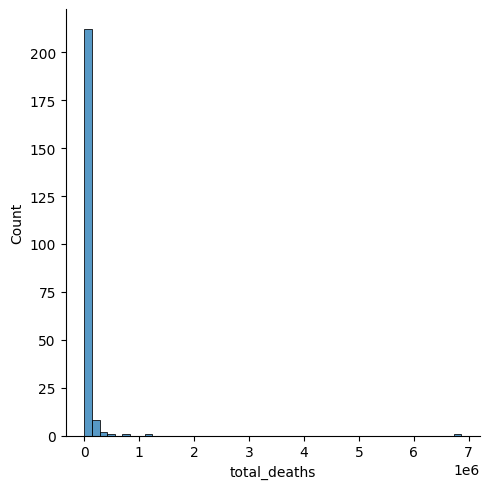

In [ ]:
sns.displot(df2_copy['total_deaths'], kde=False,bins=50)

In [ ]:
df2_copy = df2_copy.replace("N/A", pd.NA)
df2_copy[columnas_name] = df2_copy[columnas_name].fillna(0)

In [ ]:
df2_copy.head()

country_other  total_cases  new_cases  total_deaths  new_deaths  \
0           USA  106627427.0        0.0     1159824.0         0.0   
1         India   44939515.0        0.0      531508.0         0.0   
2        France   39980570.0        0.0      166556.0         0.0   
3       Germany   38403667.0        0.0      173044.0         0.0   
4        Brazil   37449418.0        0.0      701494.0         0.0   

   total_recovered  new_recovered  active_cases  serious_critical  \
0      104549551.0            0.0      918052.0            1368.0   
1       44356693.0            0.0       51314.0               0.0   
2       39677000.0            0.0      137014.0             869.0   
3       38192900.0          600.0       37723.0               0.0   
4       36249161.0            0.0      498763.0               0.0   

   tot_cases_1m_pop  deaths_1m_pop   total_tests  tests_1m_pop    population  
0          318476.0         3464.0  1.176835e+09     3514983.0  3.348053e+08  
1           31948.0          378.0  9.264966e+08      658663.0  1.406632e+09  
2          609604.0         2540.0  2.714902e+08     4139547.0  6.558452e+07  
3          457821.0         2063.0  1.223324e+08     1458359.0  8.388360e+07  
4          173897.0         3257.0  6.377617e+07      296146.0  2.153536e+08

In [ ]:
resumen_dataframe(df2_copy)

RESUMEN GENERAL DEL DATAFRAME
Dimensiones del DataFrame: 232 filas y 14 columnas
------------------------------------------------------------
Cantidad de datos nulos por columna:
                  Nulos  Porcentaje (%)
country_other         0             0.0
total_cases           0             0.0
new_cases             0             0.0
total_deaths          0             0.0
new_deaths            0             0.0
total_recovered       0             0.0
new_recovered         0             0.0
active_cases          0             0.0
serious_critical      0             0.0
tot_cases_1m_pop      0             0.0
deaths_1m_pop         0             0.0
total_tests           0             0.0
tests_1m_pop          0             0.0
population            0             0.0
------------------------------------------------------------
Valores únicos por columna:
country_other       232
total_cases         232
new_cases             6
total_deaths        212
new_deaths            2
total_recove

In [ ]:
def estadisticas_descriptivas(df, columna):
    """
    Calcula estadísticas descriptivas para una columna de un DataFrame.

    Parámetros:
    df: DataFrame de Pandas
    columna: str, nombre de la columna numérica a analizar

    Retorna:
    Un diccionario con las estadísticas calculadas.
    """
    datos = df[columna]

    # Cálculos estadísticos
    promedio = np.mean(datos)
    mediana = np.median(datos)
    media_truncada = stats.trim_mean(datos, proportiontocut=0.05)
    desviacion_estandar = np.std(datos, ddof=1)
    rango = np.ptp(datos)
    percentil_25 = np.percentile(datos, 25)
    percentil_75 = np.percentile(datos, 75)
    rango_intercuartil = percentil_75 - percentil_25

    resultados = {
        'Promedio': promedio,
        'Mediana': mediana,
        'Media Truncada (5%)': media_truncada,
        'Desviación Estándar': desviacion_estandar,
        'Rango': rango,
        'Percentil 25': percentil_25,
        'Percentil 75': percentil_75,
        'Rango Intercuartil': rango_intercuartil
    }

    return resultados

# Función para mostrar las estadísticas en formato de tabla para todas las columnas
def mostrar_estadisticas_para_todas_las_columnas(df):
    """
    Calcula y muestra estadísticas descriptivas para todas las columnas numéricas de un DataFrame.

    Parámetros:
    df: DataFrame de Pandas

    Retorna:
    Un DataFrame con las estadísticas descriptivas para cada columna numérica.
    """
    columnas_numericas = df.select_dtypes(include=np.number).columns
    estadisticas_totales = {}

    for columna in columnas_numericas:
        estadisticas_totales[columna] = estadisticas_descriptivas(df, columna)

    # Convertir el diccionario de resultados en un DataFrame
    df_estadisticas = pd.DataFrame(estadisticas_totales)
    return df_estadisticas

# Ejemplo de uso
# estadisticas_df = mostrar_estadisticas_para_todas_las_columnas(df)
# print(estadisticas_df)




In [ ]:
mostrar_estadisticas_para_todas_las_columnas(df2_copy)

total_cases     new_cases  total_deaths  new_deaths  \
Promedio             5.922601e+06    125.094828  5.916825e+04    0.025862   
Mediana              2.080335e+05      0.000000  1.971000e+03    0.000000   
Media Truncada (5%)  1.340789e+06      0.000000  1.317698e+04    0.000000   
Desviación Estándar  4.593526e+07   1339.736929  4.609176e+05    0.277939   
Rango                6.870217e+08  14511.000000  6.863517e+06    3.000000   
Percentil 25         2.517500e+04      0.000000  1.812500e+02    0.000000   
Percentil 75         1.324580e+06      0.000000  1.420450e+04    0.000000   
Rango Intercuartil   1.299404e+06      0.000000  1.402325e+04    0.000000   

                     total_recovered  new_recovered  active_cases  \
Promedio                5.604029e+06     179.491379  1.699781e+05   
Mediana                 1.336595e+05       0.000000  7.055000e+02   
Media Truncada (5%)     1.204380e+06       0.061905  1.028056e+04   
Desviación Estándar     4.411465e+07    1602.636931  1.561362e+06   
Rango                   6.595521e+08   20724.000000  2.060610e+07   
Percentil 25            1.213575e+04       0.000000  1.875000e+01   
Percentil 75            1.273887e+06       0.000000  9.425000e+03   
Rango Intercuartil      1.261751e+06       0.000000  9.406250e+03   

                     serious_critical  tot_cases_1m_pop  deaths_1m_pop  \
Promedio                   206.413793     195031.838362    1211.015086   
Mediana                      1.000000     123760.500000     779.500000   
Media Truncada (5%)         14.995238     181953.050000    1091.716667   
Desviación Estándar       2580.700128     198363.341945    1283.547476   
Rango                    39292.000000     706146.000000    6535.000000   
Percentil 25                 0.000000      16828.500000     133.750000   
Percentil 75                17.250000     314705.000000    1951.500000   
Rango Intercuartil          17.250000     297876.500000    1817.750000   

                      total_tests  tests_1m_pop    population  
Promedio             3.007449e+07  1.961049e+06  3.424541e+07  
Mediana              1.671066e+06  7.173535e+05  5.533165e+06  
Media Truncada (5%)  1.109391e+07  1.371637e+06  1.544490e+07  
Desviación Estándar  1.143474e+08  3.531832e+06  1.377903e+08  
Rango                1.176835e+09  2.330212e+07  1.448471e+09  
Percentil 25         2.198255e+05  7.812500e+04  4.092715e+05  
Percentil 75         1.143967e+07  2.097888e+06  2.170759e+07  
Rango Intercuartil   1.121984e+07  2.019763e+06  2.129832e+07

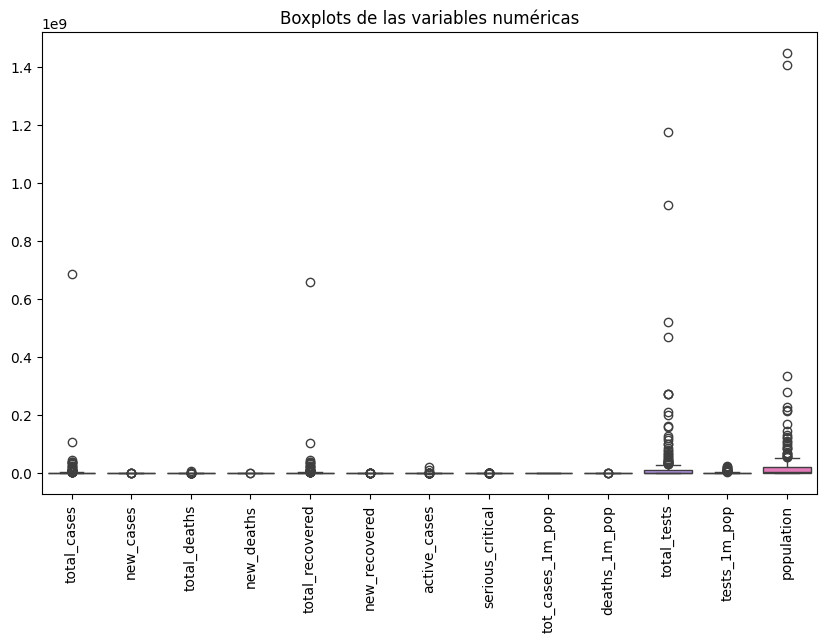

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear boxplots para todas las columnas numéricas
def crear_boxplots(df):
    columnas_numericas = df.select_dtypes(include=np.number).columns
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[columnas_numericas])
    plt.xticks(rotation=90)  # Girar etiquetas si son muchas columnas
    plt.title('Boxplots de las variables numéricas')
    plt.show()

# Llamar a la función para graficar
crear_boxplots(df2_copy)


In [ ]:
def filtrar_valores_atipicos(df):
    columnas_numericas = df.select_dtypes(include=np.number).columns
    df_filtrado = df.copy()  # Copia del DataFrame para aplicar filtros

    for columna in columnas_numericas:
        Q1 = df[columna].quantile(0.25)
        Q3 = df[columna].quantile(0.75)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        # Filtrar valores dentro de los límites
        df_filtrado = df_filtrado[(df_filtrado[columna] >= limite_inferior) &
                                  (df_filtrado[columna] <= limite_superior)]

    return df_filtrado

# Filtrar los valores atípicos y comparar con el DataFrame original
df2_filtrado = filtrar_valores_atipicos(df2_copy)


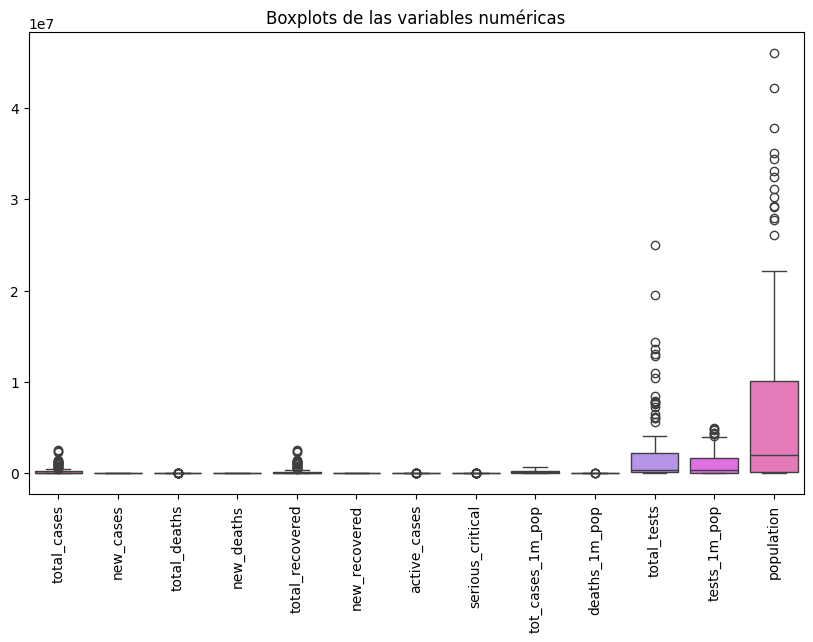

In [ ]:
# Llamar a la función para graficar
crear_boxplots(df2_filtrado)

In [ ]:
def comparar_estadisticas(df_original, df_filtrado):
    columnas_numericas = df2_copy.select_dtypes(include=np.number).columns
    estadisticas_original = df2_copy[columnas_numericas].agg(['mean', 'median', 'std']).T
    estadisticas_filtrado = df2_filtrado[columnas_numericas].agg(['mean', 'median', 'std']).T

    print("Estadísticas antes de filtrar:")
    print(estadisticas_original)

    print("\nEstadísticas después de filtrar:")
    print(estadisticas_filtrado)

# Comparar estadísticas antes y después de filtrar
comparar_estadisticas(df2_copy, df2_filtrado)


Estadísticas antes de filtrar:
                          mean     median           std
total_cases       5.922601e+06   208033.5  4.593526e+07
new_cases         1.250948e+02        0.0  1.339737e+03
total_deaths      5.916825e+04     1971.0  4.609176e+05
new_deaths        2.586207e-02        0.0  2.779394e-01
total_recovered   5.604029e+06   133659.5  4.411465e+07
new_recovered     1.794914e+02        0.0  1.602637e+03
active_cases      1.699781e+05      705.5  1.561362e+06
serious_critical  2.064138e+02        1.0  2.580700e+03
tot_cases_1m_pop  1.950318e+05   123760.5  1.983633e+05
deaths_1m_pop     1.211015e+03      779.5  1.283547e+03
total_tests       3.007449e+07  1671065.5  1.143474e+08
tests_1m_pop      1.961049e+06   717353.5  3.531832e+06
population        3.424541e+07  5533165.0  1.377903e+08

Estadísticas después de filtrar:
                          mean     median           std
total_cases       2.538560e+05    43133.0  4.804614e+05
new_cases         0.000000e+00        0

In [ ]:
# Función para generar y mostrar tablas de frecuencia para todas las variables categóricas
def tablas_de_frecuencia(df):
    # Seleccionar columnas categóricas
    columnas_categoricas = df.select_dtypes(include='object').columns
    if len(columnas_categoricas) == 0:
        print("No se encontraron columnas categóricas en el DataFrame.")
        return

    # Lista para almacenar cada tabla de frecuencia
    tablas_frecuencia = []

    for columna in columnas_categoricas:
        #print(f"\nProcesando tabla de frecuencia para la columna: {columna}")

        # Crear la tabla de frecuencia para la columna actual
        frecuencia = df[columna].value_counts().reset_index()
        frecuencia.columns = ['Valor', 'Frecuencia']

        # Agregar el nombre de la columna categórica como una columna adicional 'Variable'
        frecuencia['Variable'] = columna

        # Agregar la tabla de frecuencia a la lista de tablas
        tablas_frecuencia.append(frecuencia)

    # Concatenar todas las tablas de frecuencia en un solo DataFrame y reorganizar columnas
    resultado = pd.concat(tablas_frecuencia, axis=0, ignore_index=True)
    resultado = resultado[['Variable', 'Valor', 'Frecuencia']]

    # Mostrar el DataFrame de todas las tablas de frecuencia
    display(resultado)

#llamar la funcion
tablas_de_frecuencia(df_1)


Variable                  Valor  Frecuencia
0                    sex              Masculino      114147
1                    sex               Femenino       99765
2           patient_type          Hospitalizado      116375
3           patient_type                   Alta       97537
4                intubed            Desconocido      102870
5                intubed                     No       84245
6                intubed                     Sí       26797
7              pneumonia                     No      122730
8              pneumonia                     Sí       84112
9              pneumonia            Desconocido        7070
10              pregnant            Desconocido      116101
11              pregnant                     No       94799
12              pregnant                     Sí        3012
13              diabetes                     No      144177
14              diabetes                     Sí       66920
15              diabetes            Desconocido        2815
16                  copd                     No      197509
17                  copd                     Sí       13899
18                  copd            Desconocido        2504
19                asthma                     No      195460
20                asthma                     Sí       15971
21                asthma            Desconocido        2481
22               inmsupr                     No      198814
23               inmsupr                     Sí       12197
24               inmsupr            Desconocido        2901
25          hipertension                     No      130967
26          hipertension                     Sí       80350
27          hipertension            Desconocido        2595
28         other_disease                     No      190342
29         other_disease                     Sí       19246
30         other_disease            Desconocido        4324
31        cardiovascular                     No      193623
32        cardiovascular                     Sí       17711
33        cardiovascular            Desconocido        2578
34               obesity                     No      151667
35               obesity                     Sí       59720
36               obesity            Desconocido        2525
37         renal_chronic                     No      194769
38         renal_chronic                     Sí       16637
39         renal_chronic            Desconocido        2506
40               tobacco                     No      179285
41               tobacco                     Sí       31913
42               tobacco            Desconocido        2714
43  clasiffication_final  Negativo o Inconcluso      117970
44  clasiffication_final       Positivo - Grave       89483
45  clasiffication_final        Positivo - Leve        4672
46  clasiffication_final    Positivo - Moderado        1787

<ipython-input-43-66b7ec75912f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_1['age'], kde=False,bins=50)


Text(0, 0.5, 'Frecuencia')

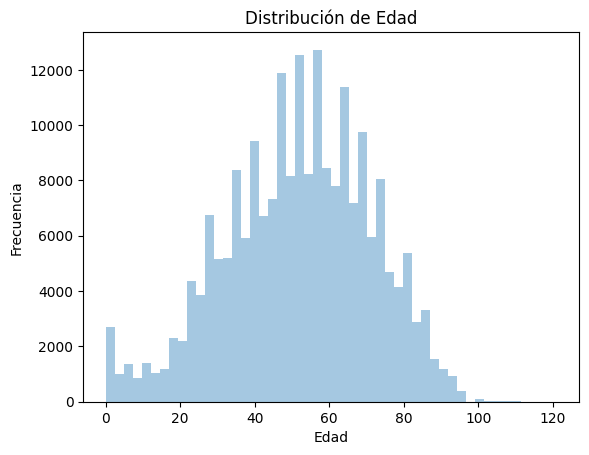

In [ ]:
sns.distplot(df_1['age'], kde=False,bins=50)
plt.title('Distribución de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')



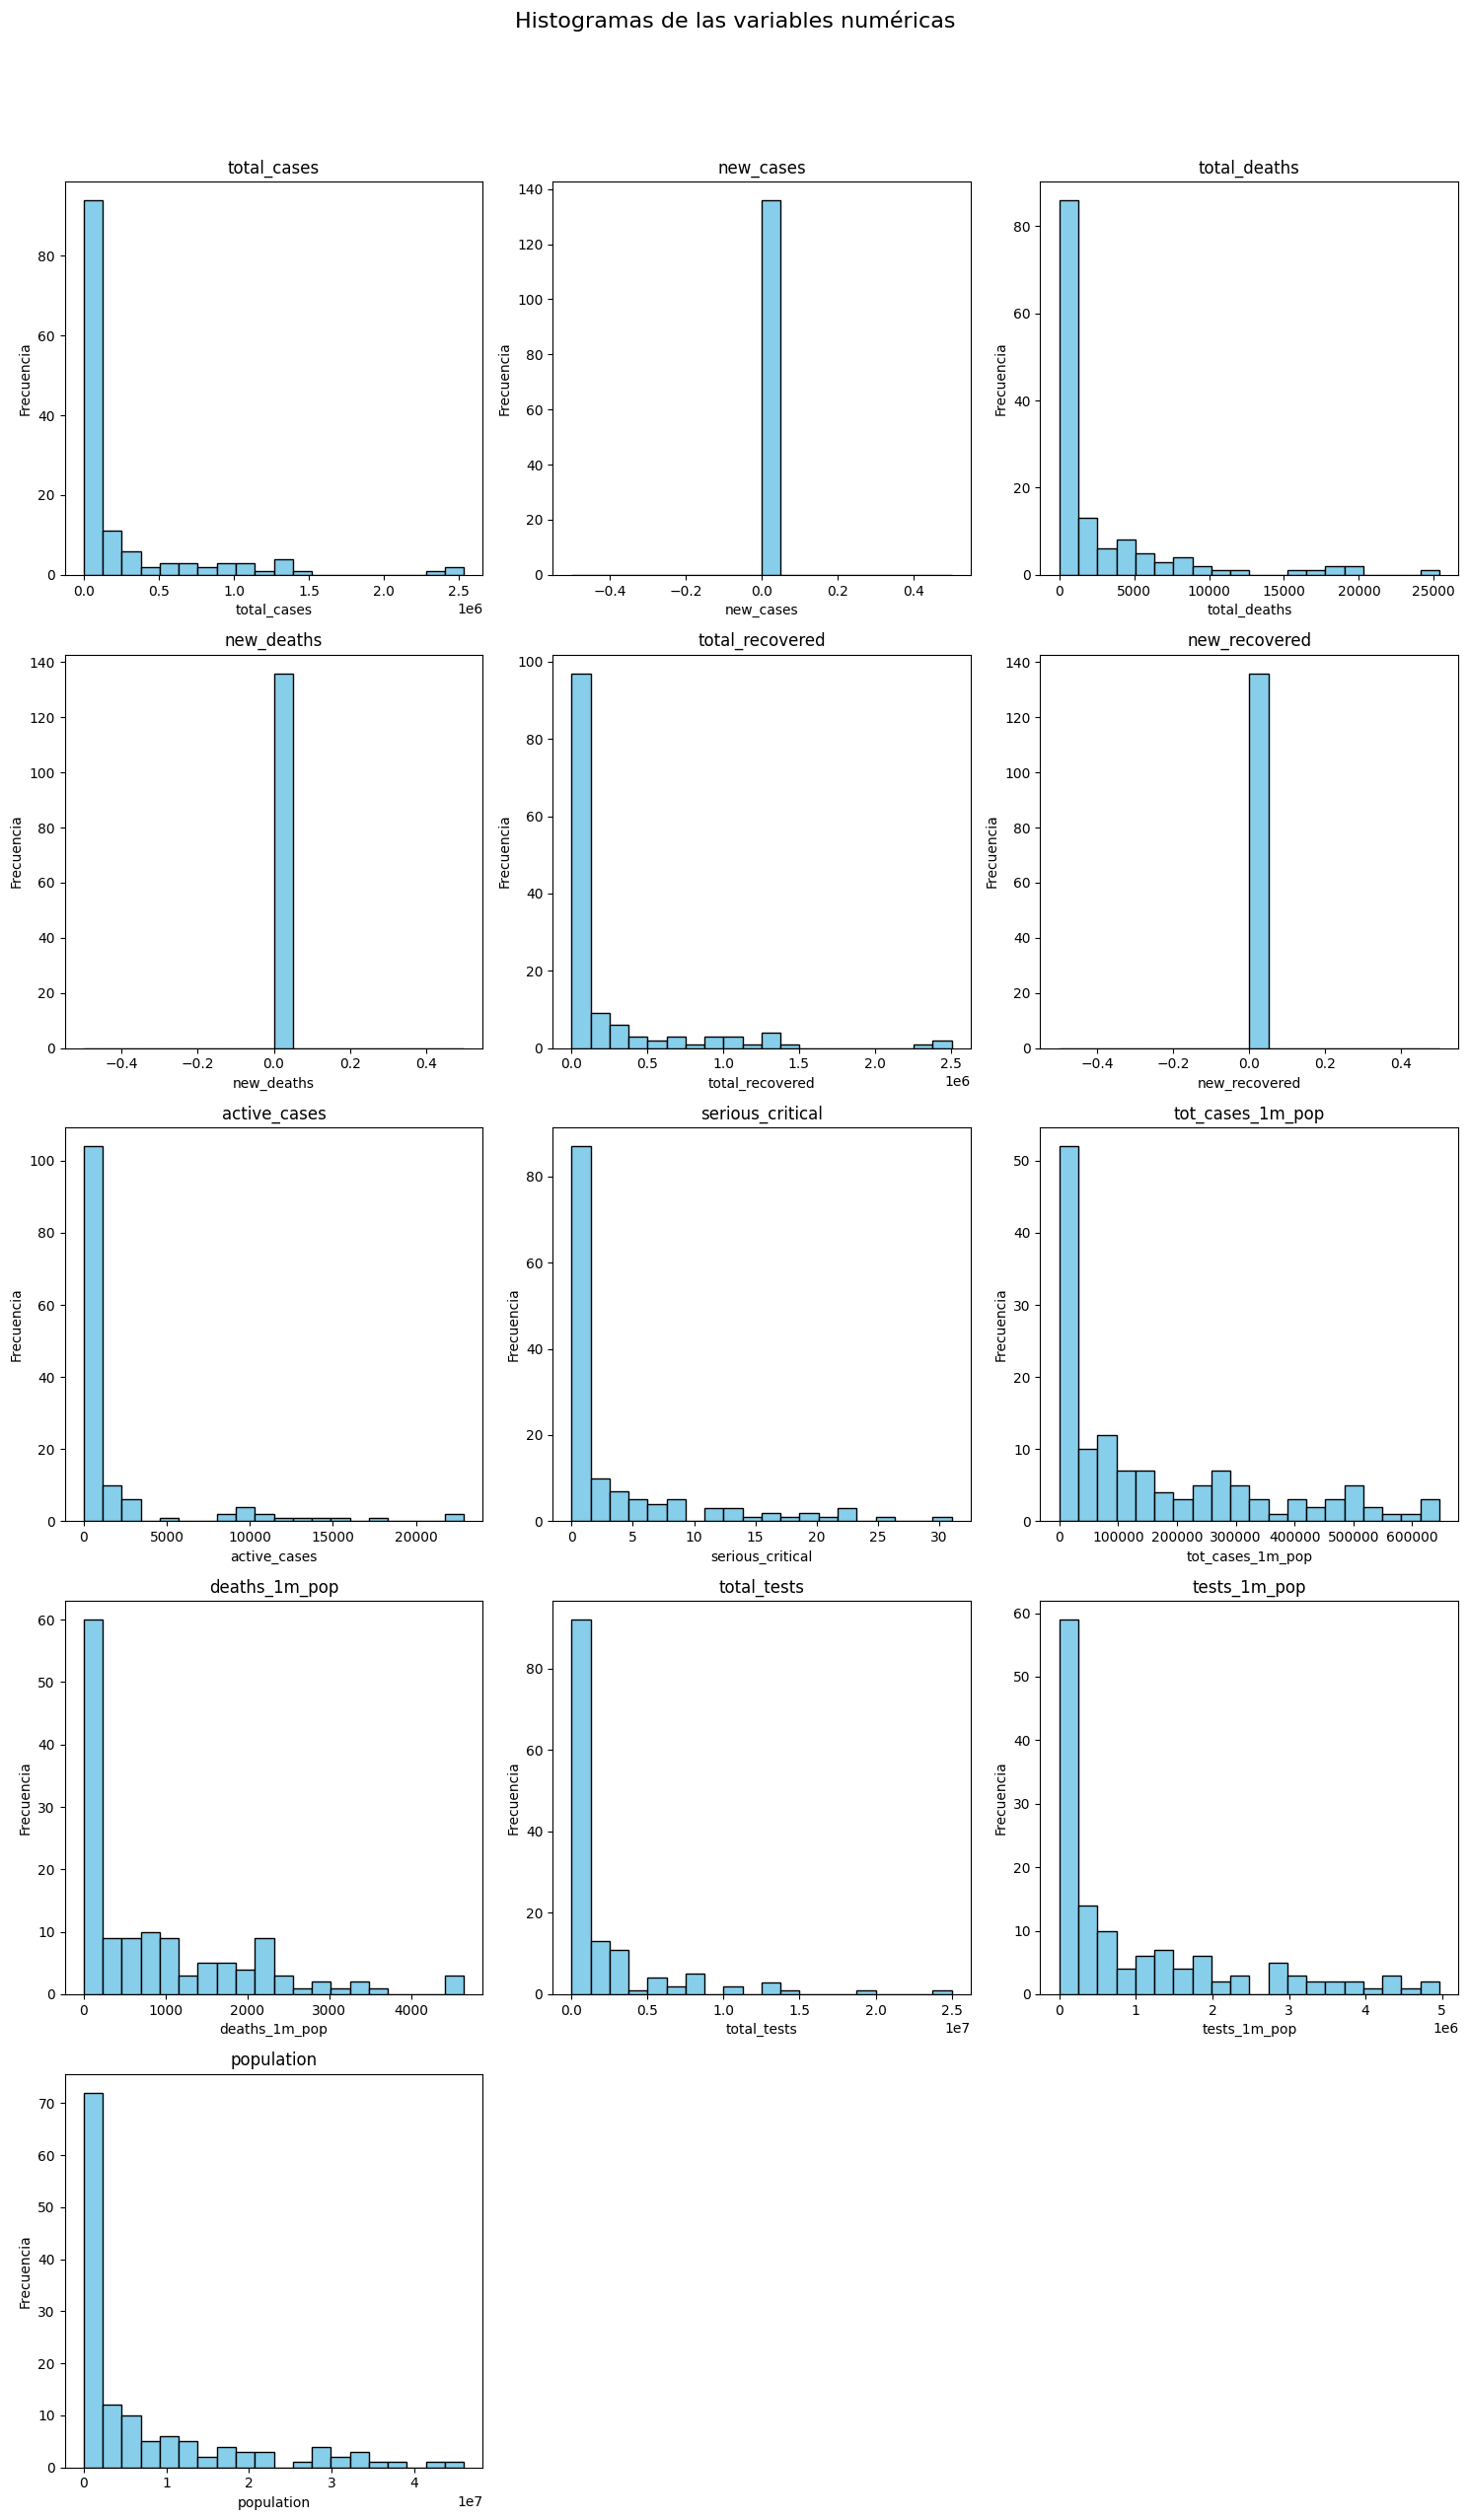

In [ ]:
# Función para crear histogramas para variables numéricas en una matriz de subplots (3 columnas por fila)
def crear_histogramas(df):
    columnas_numericas = df.select_dtypes(include=np.number).columns
    num_columnas = len(columnas_numericas)
    filas = (num_columnas // 3) + (num_columnas % 3 > 0)  # Calcular el número de filas necesarias para 3 columnas

    fig, axes = plt.subplots(nrows=filas, ncols=3, figsize=(15, 5 * filas))
    fig.suptitle('Histogramas de las variables numéricas', fontsize=16, y=1.02)

    # Aplanar los ejes en caso de que haya menos de 3 columnas o si los ejes son una matriz
    axes = axes.flatten()

    for i, columna in enumerate(columnas_numericas):
        df[columna].plot(kind='hist', bins=20, ax=axes[i], title=columna, color="skyblue", edgecolor="black")
        axes[i].set_xlabel(columna)
        axes[i].set_ylabel("Frecuencia")

    # Eliminar cualquier subplot vacío en caso de que haya menos variables que subplots disponibles
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)

    plt.tight_layout(rect=[0, 0, 1, 0.98])  # Ajustar el espacio para el título general
    plt.show()

# Llamar a las funciones con el DataFrame 'df2_filtrado'
crear_histogramas(df2_filtrado)

In [ ]:
# Medidas de asimetría y curtosis en formato de DataFrame
def asimetria_curtosis(df):
    columnas_numericas = df.select_dtypes(include=np.number).columns
    resultados = {"Asimetría": [], "Curtosis": []}

    for columna in columnas_numericas:
        asimetria = df[columna].skew()
        curtosis = df[columna].kurtosis()
        resultados["Asimetría"].append(asimetria)
        resultados["Curtosis"].append(curtosis)

    # Crear un DataFrame con los resultados y las variables como columnas
    df_resultados = pd.DataFrame(resultados, index=columnas_numericas).T
    return df_resultados

# Calcular asimetría y curtosis
asimetria_curtosis(df2_filtrado)


total_cases  new_cases  total_deaths  new_deaths  total_recovered  \
Asimetría     2.795689        0.0      2.666721         0.0         2.854906   
Curtosis      8.531499        0.0      7.393749         0.0         8.819888   

           new_recovered  active_cases  serious_critical  tot_cases_1m_pop  \
Asimetría            0.0      3.088017          2.183072          1.111676   
Curtosis             0.0      9.732087          4.338928          0.105071   

           deaths_1m_pop  total_tests  tests_1m_pop  population  
Asimetría       1.481751     3.126673      1.367217    1.750662  
Curtosis        1.884725    11.605720      0.869418    2.303255

In [ ]:
# Seleccionar columnas categóricas
columnas_categoricas = df_1.select_dtypes(include='object').columns
print("Variables categóricas:", columnas_categoricas.tolist())


Variables categóricas: ['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'clasiffication_final']


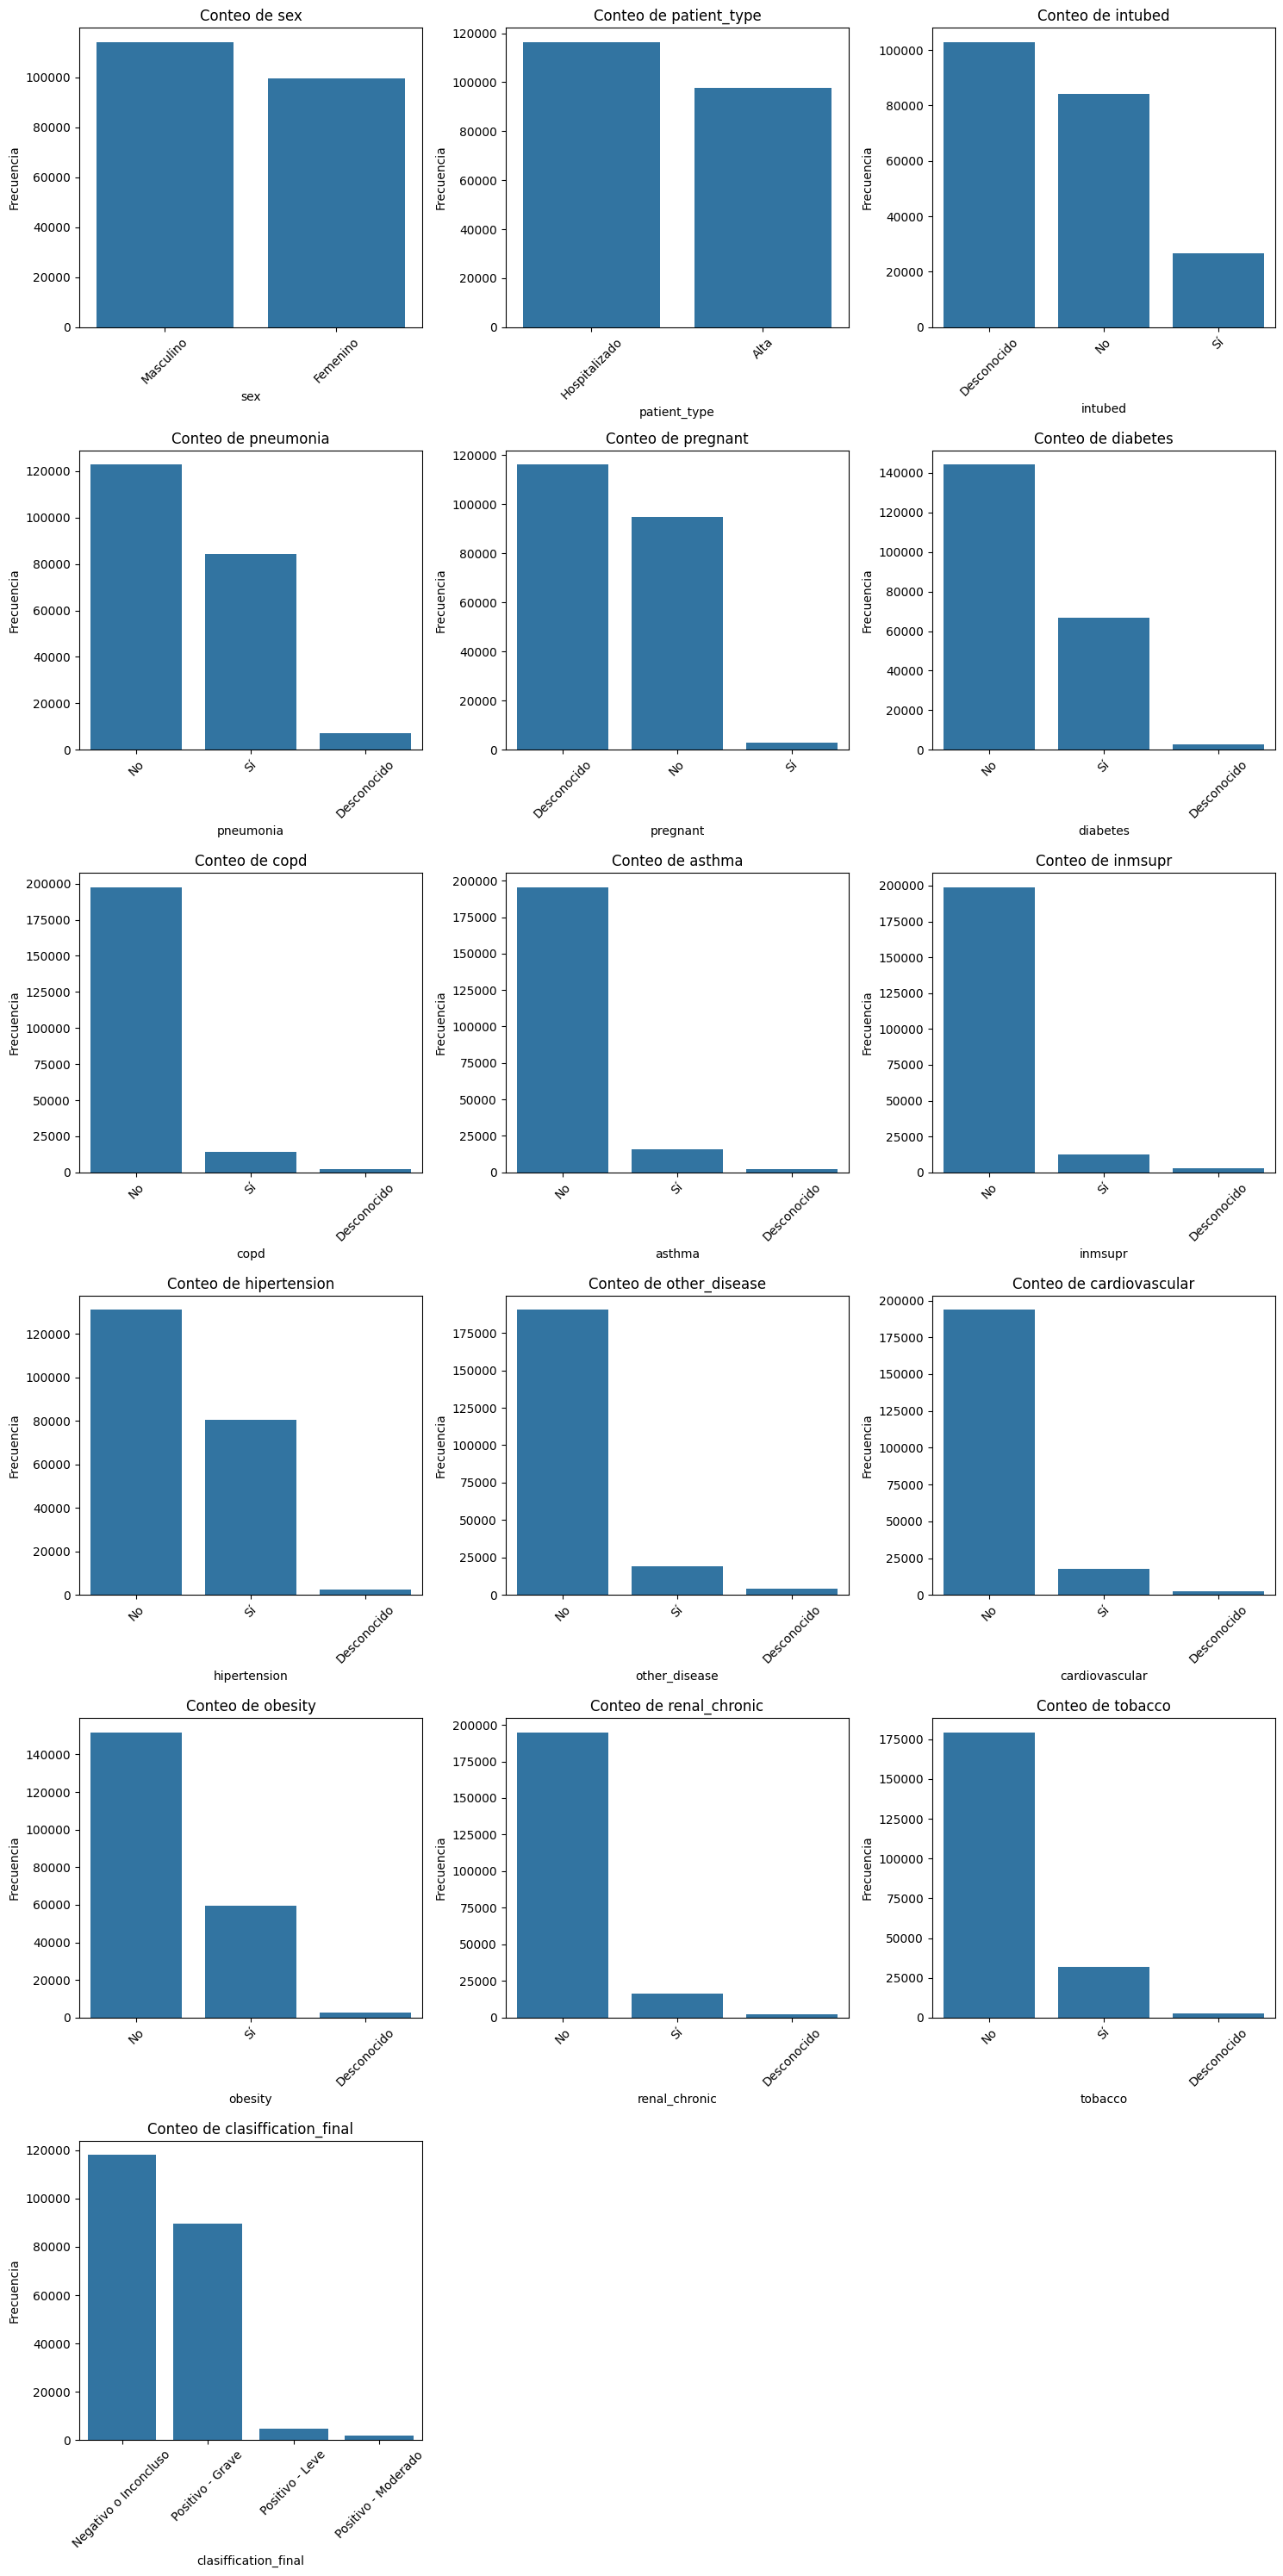

In [ ]:

# Crear gráficos de barras de frecuencia para cada columna categórica
def graficar_frecuencia_categorica(df):
    columnas_categoricas = df.select_dtypes(include='object').columns

    # Configurar una cuadrícula de subplots
    num_cols = 3
    num_filas = math.ceil(len(columnas_categoricas) / num_cols)
    fig, axes = plt.subplots(num_filas, num_cols, figsize=(15, 5 * num_filas))
    axes = axes.flatten()

    for i, columna in enumerate(columnas_categoricas):
        counts = df[columna].value_counts()
        ax = sns.barplot(x=counts.index, y=counts.values, ax=axes[i])

        # Configurar título y etiquetas
        ax.set_title(f'Conteo de {columna}')
        ax.set_xlabel(columna)
        ax.set_ylabel('Frecuencia')
        ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas del eje x para claridad

    # Eliminar ejes vacíos si sobran
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Llamar a la función con tu DataFrame filtrado
graficar_frecuencia_categorica(df_1)


In [ ]:
# tabla de contingencia
tabla_contingencia = pd.crosstab(df_1['sex'], df_1['pneumonia'])
tabla_contingencia


pneumonia  Desconocido     No     Sí
sex                                 
Femenino          3893  60955  34917
Masculino         3177  61775  49195

In [ ]:
# tabla de contingencia
tabla_contingencia = pd.crosstab(df_1['age'], df_1['sex'])
tabla_contingencia

sex    Femenino  Masculino
age                       
0.0         572        613
1.0         427        493
2.0         277        317
3.0         233        271
4.0         232        270
...         ...        ...
117.0         2          1
118.0         0          2
119.0         2          0
120.0         1          4
121.0         1          0

[118 rows x 2 columns]

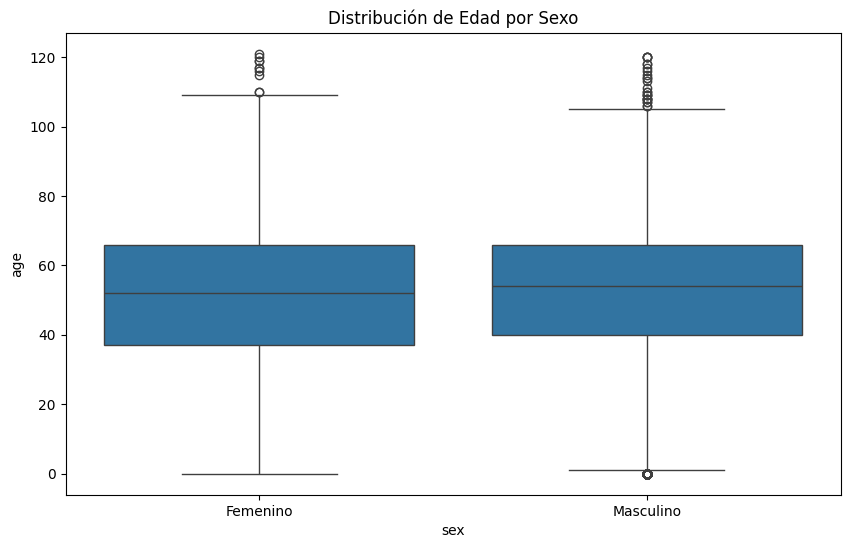

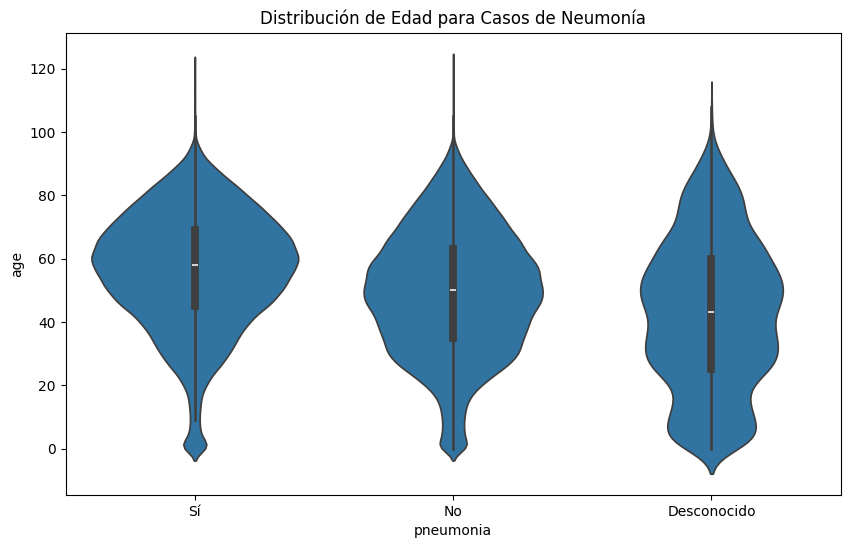

In [ ]:
# Boxplot para la combinación de 'age' y 'sex'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_1, x='sex', y='age')
plt.title('Distribución de Edad por Sexo')
plt.show()

# Violinplot para la combinación de 'age' y 'pneumonia'
plt.figure(figsize=(10, 6))
sns.violinplot(data=df_1, x='pneumonia', y='age')
plt.title('Distribución de Edad para Casos de Neumonía')
plt.show()


En el modulo 2 trabajamos el dataset 1 de tal manera que las variables quedaron todas categoricas, para poder realizar las operaciones que queremos vamos a mapear los valores de Desconocido como 0, Si como 1 y No como 2 para crear un mapa de calor.

In [ ]:
# Mapeo de valores
mapa_valores = {'Sí': 1, 'No': 2, 'Desconocido': 0}  # Puedes usar NaN en lugar de -1 si deseas ignorarlos

# Convertir todas las columnas categóricas con este mapeo
df1_numerico = df_1.replace(mapa_valores)

# Verificar el resultado
df1_numerico.head()


<ipython-input-51-0e1577a056f1>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1_numerico = df_1.replace(mapa_valores)


sex   patient_type  date_died  intubed  pneumonia   age  pregnant  \
0   Femenino           Alta 2020-03-05        0          1  65.0         2   
1  Masculino           Alta 2020-03-06        0          1  72.0         0   
2  Masculino  Hospitalizado 2020-09-06        1          2  55.0         0   
3   Femenino           Alta 2020-12-06        0          2  53.0         2   
4  Masculino           Alta 2020-05-23        0          2  68.0         0   

   diabetes  copd  asthma  inmsupr  hipertension  other_disease  \
0         2     2       2        2             1              2   
1         2     2       2        2             1              2   
2         1     2       2        2             2              2   
3         2     2       2        2             2              2   
4         1     2       2        2             1              2   

   cardiovascular  obesity  renal_chronic  tobacco   clasiffication_final  icu  
0               2        2              2        2       Positivo - Grave  0.0  
1               2        1              1        2  Negativo o Inconcluso  0.0  
2               2        2              2        2       Positivo - Grave  2.0  
3               2        2              2        2  Negativo o Inconcluso  0.0  
4               2        2              2        2       Positivo - Grave  0.0

In [ ]:
df1_numerico_copy=df1_numerico.drop(columns=['sex','patient_type'])

In [ ]:
# Mapear la variable clasificación
def map_classification(x):
  if x == 'Negativo o Inconcluso':
    return 4
  elif x == 'Positivo - Leve':
    return 1
  elif x == 'Positivo - Moderado':
    return 2
  elif x == 'Positivo - Grave':
    return 3  # No cambia el valor 3
  return x

df1_numerico_copy['clasiffication_final'] = df1_numerico_copy['clasiffication_final'].apply(map_classification)

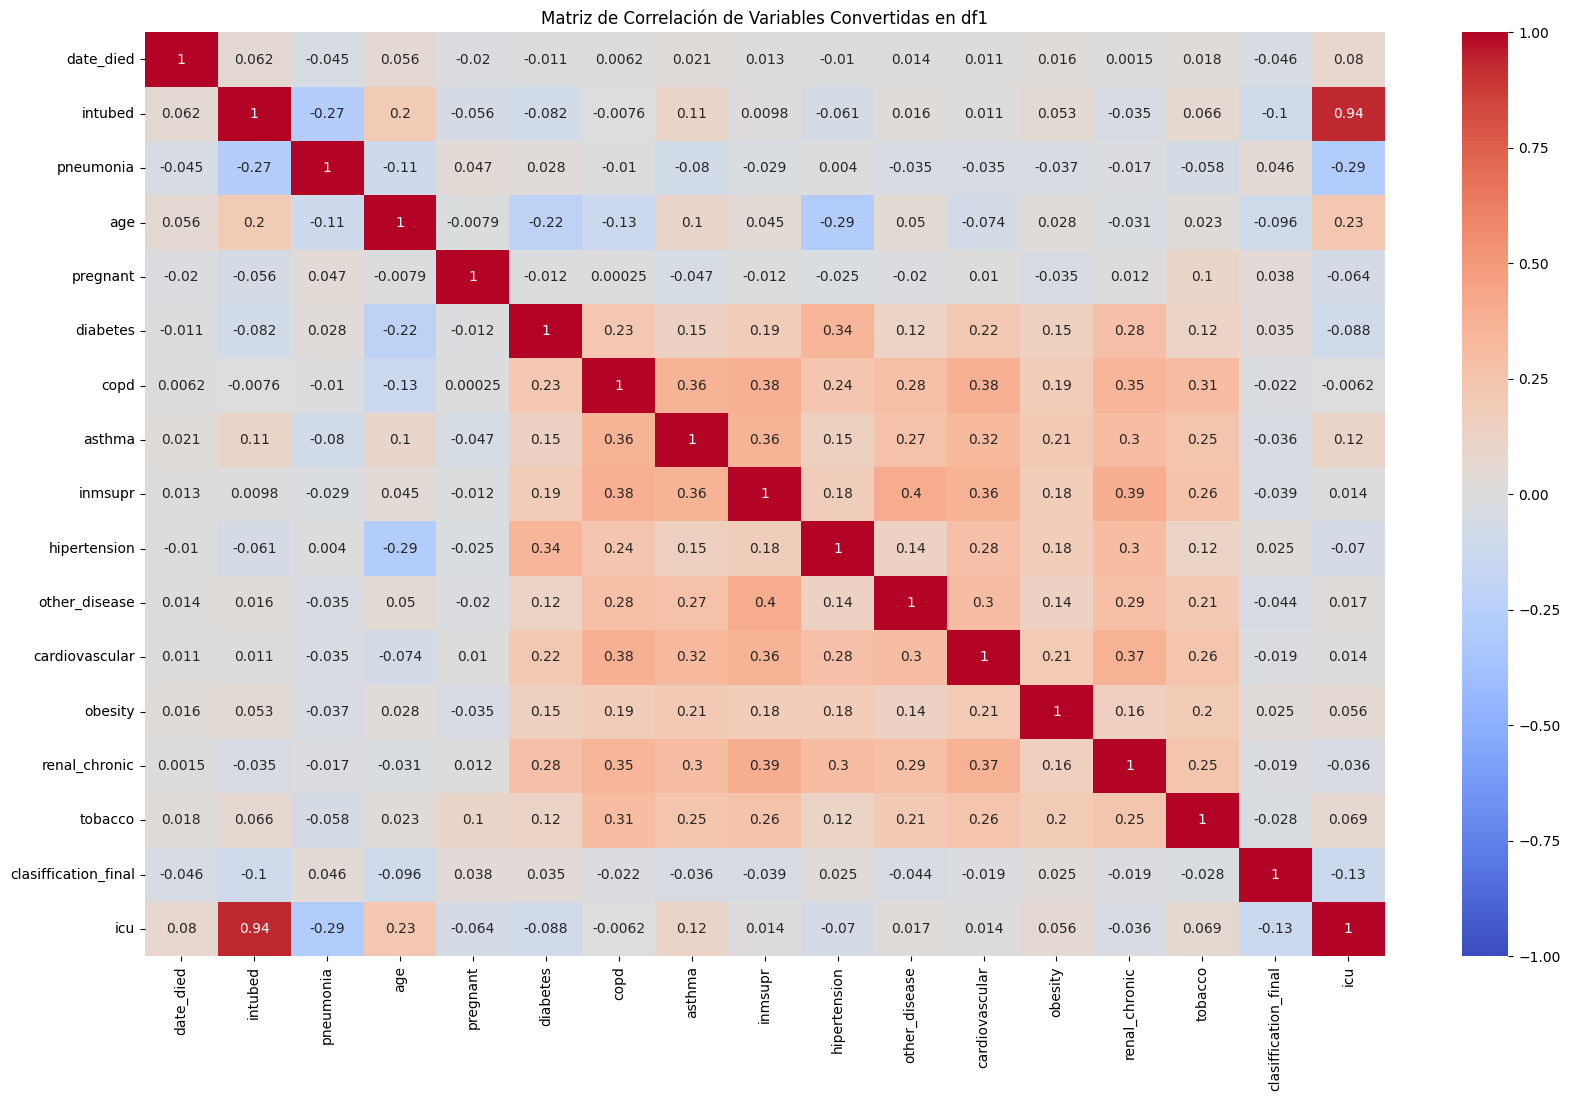

In [ ]:
# Matriz de correlación
plt.figure(figsize=(20, 12))
sns.heatmap(df1_numerico_copy.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Matriz de Correlación de Variables Convertidas en df1")
plt.show()

Al analizar la matriz de correlación de df1 (con variables convertidas a numéricas) de pacientes con COVID-19, se pueden observar patrones importantes sobre la relación entre comorbilidades, intervenciones críticas y hospitalización. A continuación se detallan las conclusiones considerando el contexto de la pandemia:

1. Alta Correlación entre intubed e icu (0.94):

 - Existe una correlación extremadamente alta entre las variables intubed (intubado) e icu (unidad de cuidados intensivos). Esto indica que la mayoría de los pacientes con COVID-19 que fueron intubados también fueron ingresados en la UCI. Este hallazgo es consistente con la realidad clínica, donde los pacientes en estado crítico, especialmente aquellos con COVID-19, suelen requerir soporte ventilatorio en unidades de cuidados intensivos.

2. Comorbilidades Asociadas al COVID-19:

 -Varias comorbilidades, como copd (enfermedad pulmonar obstructiva crónica), diabetes, hipertension, y cardiovascular (enfermedad cardiovascular), muestran correlaciones significativas entre sí. Por ejemplo:
  - copd tiene correlaciones moderadas con diabetes (0.28), hipertension (0.24), y cardiovascular (0.38). Esto sugiere que los pacientes con EPOC y COVID-19 tienen mayores probabilidades de presentar otras condiciones crónicas, lo cual incrementa el riesgo de complicaciones graves.
  - diabetes y hipertension están correlacionadas (0.34), lo que es común en pacientes con COVID-19, ya que ambas condiciones son factores de riesgo conocidos para la enfermedad severa y se asocian con una mayor probabilidad de hospitalización y complicaciones.

3. Relación entre obesity y Otras Comorbilidades:

 - La variable obesity (obesidad) muestra correlaciones con diabetes (0.15), hipertension (0.18), y renal_chronic (0.21). La obesidad ha sido identificada como un factor de riesgo significativo en COVID-19, asociado con un mayor riesgo de complicaciones, hospitalización y muerte. Estos datos refuerzan la importancia de la obesidad como comorbilidad en pacientes con COVID-19.

4. Enfermedad Renal Crónica y COVID-19:

 - La variable renal_chronic (enfermedad renal crónica) también tiene correlaciones notables con copd (0.35), diabetes (0.28), hipertension (0.29), y cardiovascular (0.37). Los pacientes con enfermedades renales crónicas y COVID-19 son particularmente vulnerables, ya que suelen tener múltiples comorbilidades que agravan su estado y aumentan el riesgo de complicaciones graves.

5. Relación entre intubed y age (-0.29):

 - Existe una correlación negativa entre intubed (intubado) y age. Esto podría indicar que, en este conjunto de datos, los pacientes más jóvenes con COVID-19 tienen mayores probabilidades de ser intubados. Esto podría deberse a que, en algunos casos, se intenta un tratamiento más agresivo en pacientes jóvenes, o que los pacientes de mayor edad pueden no ser candidatos para intubación debido a factores como fragilidad o comorbilidades avanzadas. Esta observación podría reflejar decisiones clínicas en el manejo de pacientes de distintas edades con COVID-19.

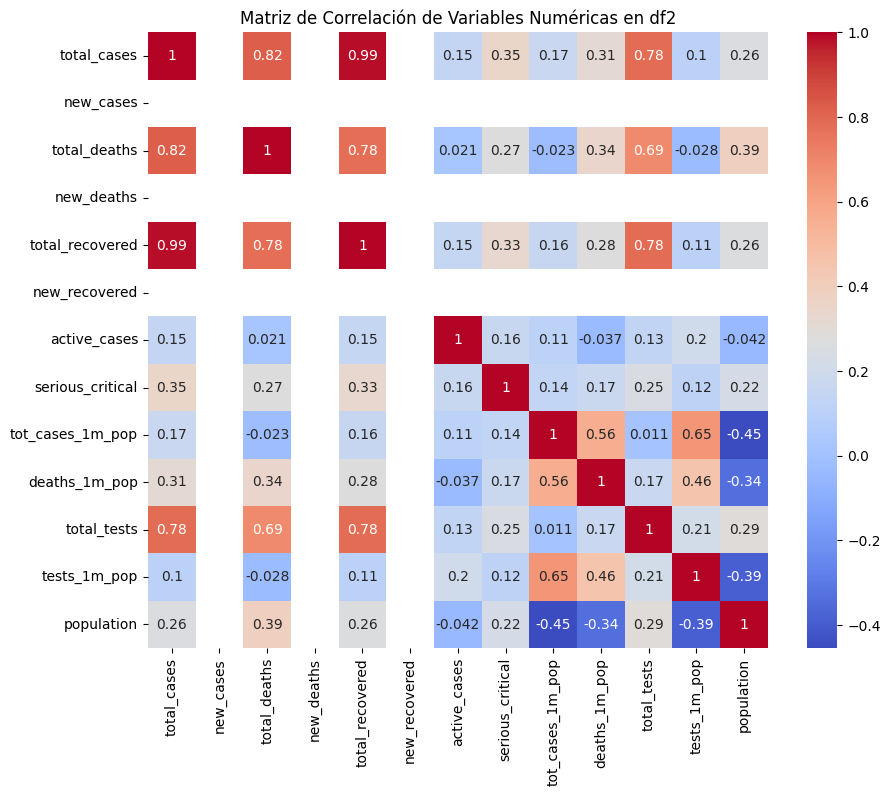

In [ ]:
df2_filtrado_1=df2_filtrado.drop(columns=['country_other'])
plt.figure(figsize=(10, 8))
sns.heatmap(df2_filtrado_1.corr(), annot=True, cmap="coolwarm")
plt.title("Matriz de Correlación de Variables Numéricas en df2")
plt.show()


Al observar la matriz de correlación de variables numéricas en df2, podemos identificar varias relaciones y patrones interesantes:

1. Relación Fuerte entre total_cases y total_deaths:

 - Existe una correlación fuerte y positiva (0.82) entre total_cases y total_deaths. Esto indica que, a mayor número de casos totales, también se observa un aumento en el número total de muertes. Este patrón es esperable, ya que un mayor número de casos en general puede conducir a un mayor número de muertes.
2. Correlación Muy Fuerte entre total_cases y total_recovered:

 - La correlación entre total_cases y total_recovered es extremadamente alta (0.99), casi perfecta. Esto sugiere que en los lugares con muchos casos también hay muchos recuperados, lo cual es lógico ya que, con más casos, más personas eventualmente se recuperan.

3. Relación entre total_tests y total_cases:

 - total_tests tiene una alta correlación con total_cases (0.78). Esto indica que, en general, los lugares con más pruebas realizadas tienden a reportar más casos, lo cual es coherente, ya que una mayor cantidad de pruebas permite identificar más casos.

4. Relación entre Casos Críticos y Tasa de Casos/Muerte por Millón:

 - serious_critical tiene una correlación moderada con tot_cases_1m_pop (0.56) y deaths_1m_pop (0.46). Esto indica que en los lugares donde hay más casos críticos, también se observan tasas más altas de casos y muertes por millón, lo cual puede sugerir que una mayor gravedad en los casos se asocia con una mayor tasa de mortalidad.

5. Relación Negativa entre population y las Tasas por Millón:

 - La variable population tiene una correlación negativa con tot_cases_1m_pop (-0.45) y deaths_1m_pop (-0.34). Esto sugiere que los lugares con poblaciones más grandes tienden a tener tasas más bajas de casos y muertes por millón, lo cual podría indicar que los lugares con menor población tienen una tasa proporcionalmente más alta de casos y muertes en comparación con su tamaño.

6. Correlación Baja entre Nuevos Casos y Nuevas Muertes:

 - La correlación entre new_cases y new_deaths no es significativa, lo cual podría indicar que, en el corto plazo, el número de muertes no siempre sigue inmediatamente a un aumento en los casos, o que el registro de nuevos casos y muertes no ocurre de manera simultánea.

Gráficos de dispersión para df1:
Gráficos de dispersión para df2:


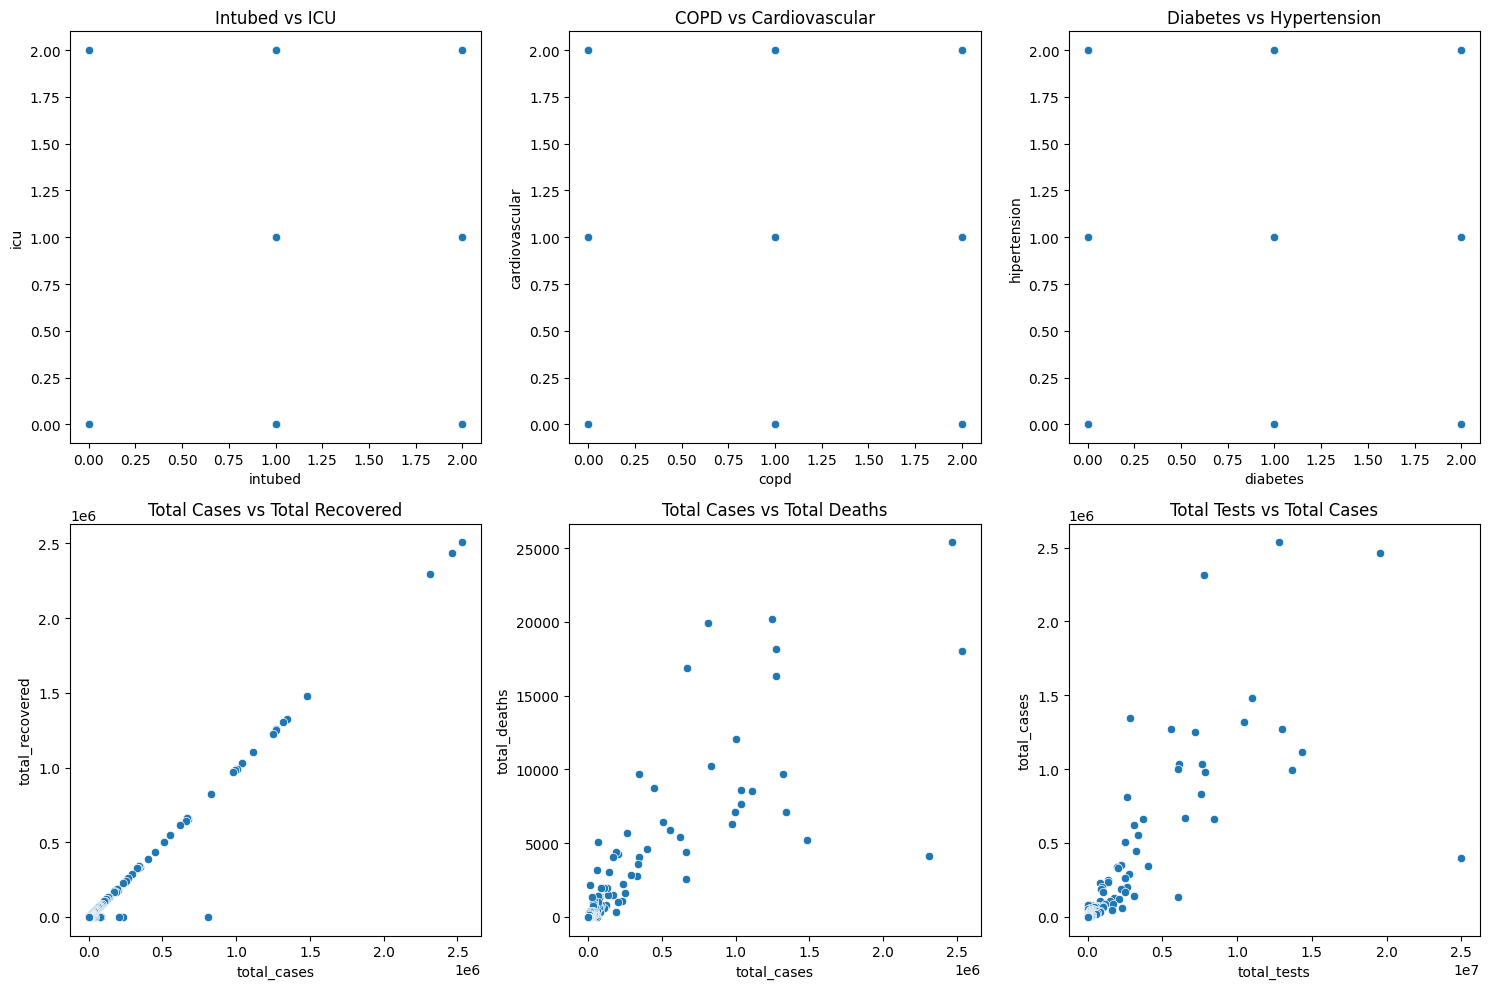

In [ ]:
# Configuración para el tamaño de los gráficos
plt.figure(figsize=(15, 10))

# Gráficos de dispersión para df1
print("Gráficos de dispersión para df1:")
plt.subplot(2, 3, 1)
sns.scatterplot(data=df1_numerico_copy, x='intubed', y='icu')
plt.title('Intubed vs ICU')

plt.subplot(2, 3, 2)
sns.scatterplot(data=df1_numerico_copy, x='copd', y='cardiovascular')
plt.title('COPD vs Cardiovascular')

plt.subplot(2, 3, 3)
sns.scatterplot(data=df1_numerico_copy, x='diabetes', y='hipertension')
plt.title('Diabetes vs Hypertension')

# Gráficos de dispersión para df2
print("Gráficos de dispersión para df2:")
plt.subplot(2, 3, 4)
sns.scatterplot(data=df2_filtrado_1, x='total_cases', y='total_recovered')
plt.title('Total Cases vs Total Recovered')

plt.subplot(2, 3, 5)
sns.scatterplot(data=df2_filtrado_1, x='total_cases', y='total_deaths')
plt.title('Total Cases vs Total Deaths')

plt.subplot(2, 3, 6)
sns.scatterplot(data=df2_filtrado_1, x='total_tests', y='total_cases')
plt.title('Total Tests vs Total Cases')

# Ajustar el espacio entre subplots para que no se sobrepongan
plt.tight_layout()
plt.show()

Error cuadrático medio (MSE): 0.11
Coeficiente de determinación (R²): 0.88


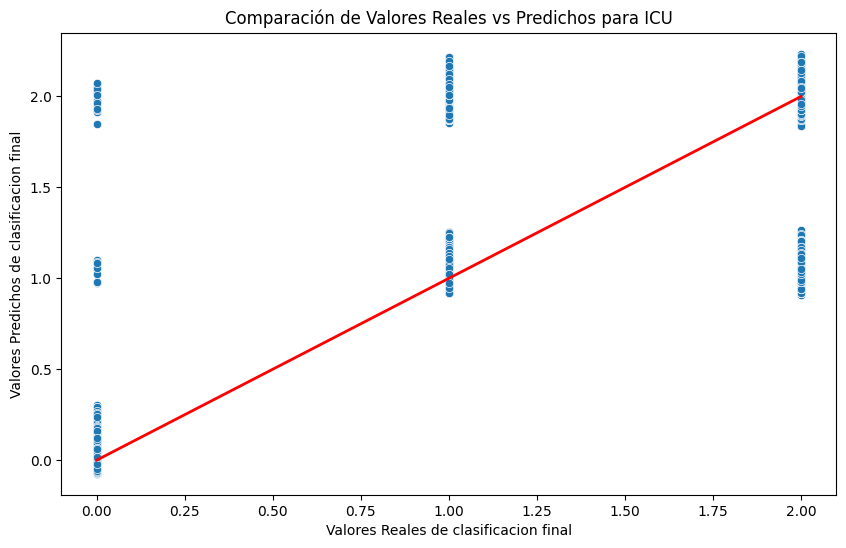

In [ ]:

# Selección de variables predictoras y objetivo
X = df1_numerico_copy[['intubed',
 'pneumonia',
 'age',
 'diabetes',
 'copd',
 'asthma',
 'inmsupr',
 'hipertension',
 'cardiovascular',
 'obesity',
 'renal_chronic',
 'tobacco','clasiffication_final']]
y = df1_numerico_copy['icu']

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación y entrenamiento del modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicción
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

# Visualización de los valores reales vs predichos
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Valores Reales de clasificacion final')
plt.ylabel('Valores Predichos de clasificacion final')
plt.title('Comparación de Valores Reales vs Predichos para ICU')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)  # Línea de referencia
plt.show()


In [ ]:
#Distribuciones muestrales y Tecnicas de evaluacion de modelo
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:

# Función para realizar bootstrap
def bootstrap(data, n_iterations=1000, sample_size=None):
    if sample_size is None:
        sample_size = len(data)

    means = []
    for _ in range(n_iterations):
        sample = np.random.choice(data, size=sample_size, replace=True)
        means.append(np.mean(sample))

    return means



Resultados de Bootstrap para USMER:
Asimetría: 0.09, Curtosis: 0.01


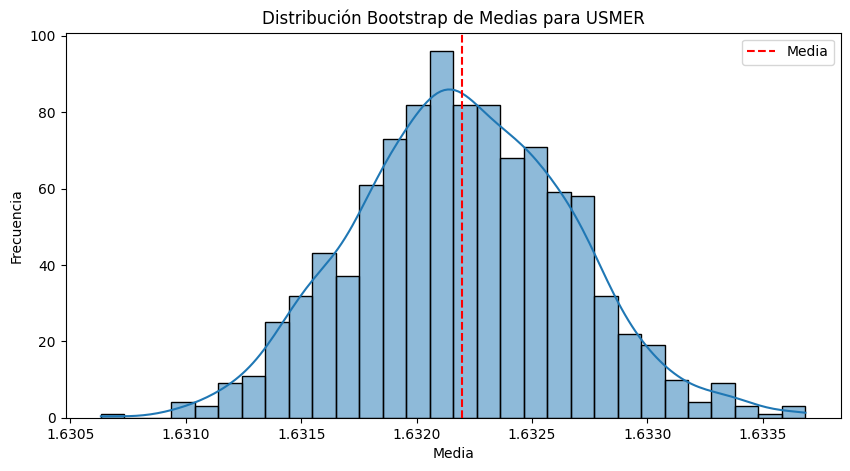


Resultados de Bootstrap para MEDICAL_UNIT:
Asimetría: 0.13, Curtosis: 0.07


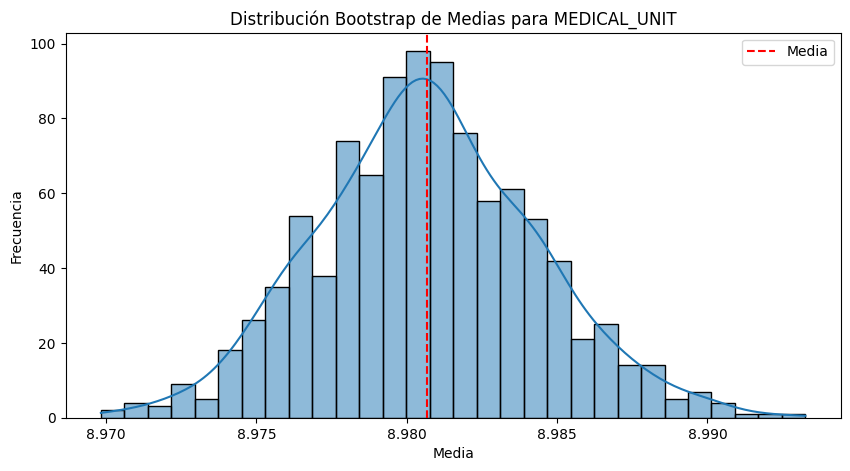


Resultados de Bootstrap para SEX:
Asimetría: 0.08, Curtosis: 0.12


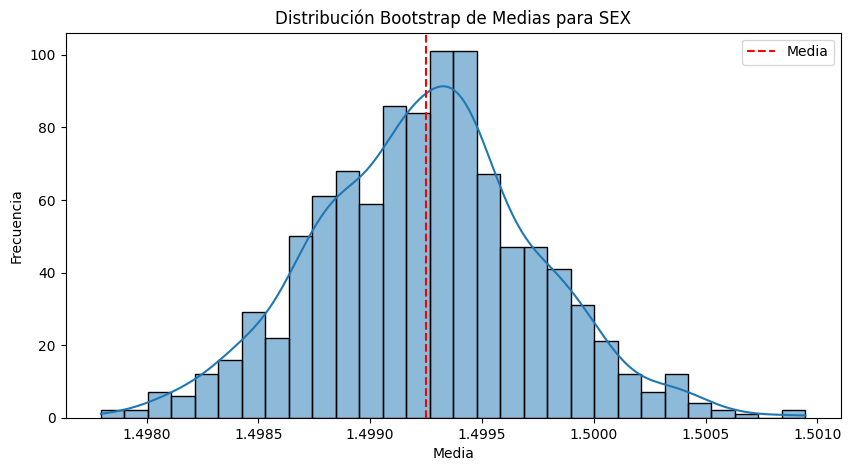


Resultados de Bootstrap para PATIENT_TYPE:
Asimetría: 0.02, Curtosis: -0.13


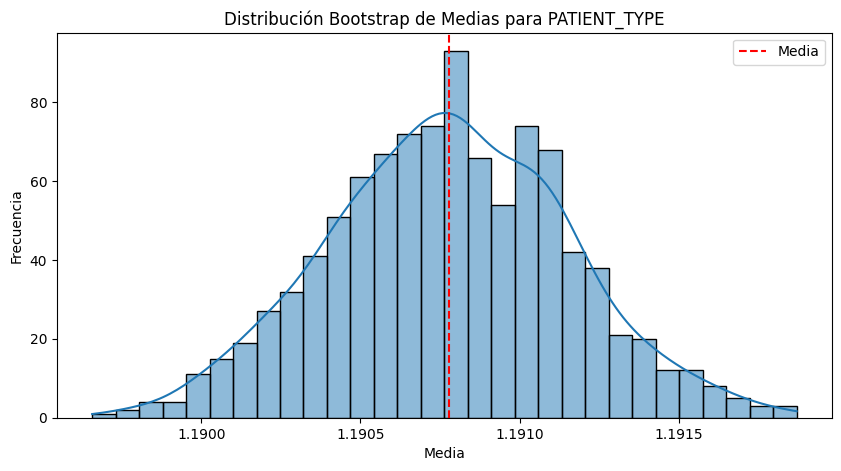


Resultados de Bootstrap para INTUBED:
Asimetría: -0.14, Curtosis: 0.14


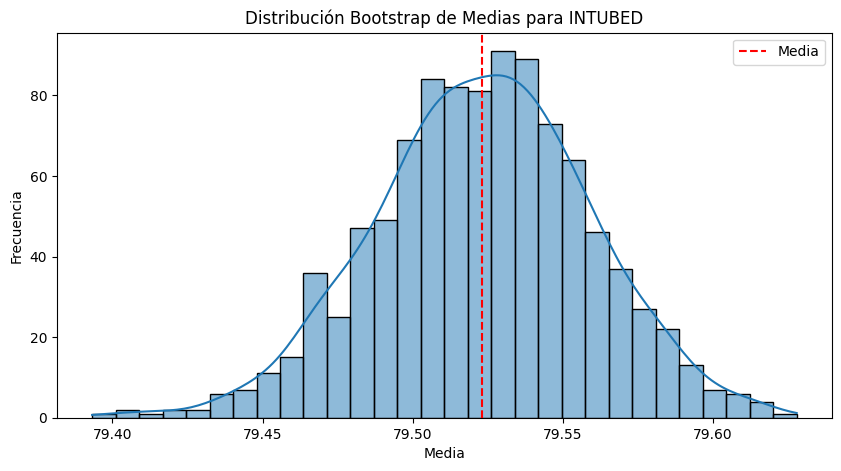


Resultados de Bootstrap para PNEUMONIA:
Asimetría: 0.00, Curtosis: -0.17


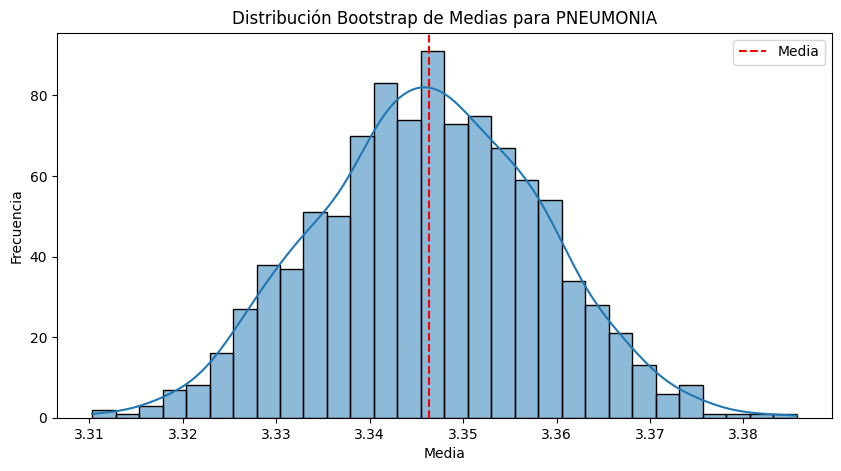


Resultados de Bootstrap para AGE:
Asimetría: 0.01, Curtosis: -0.06


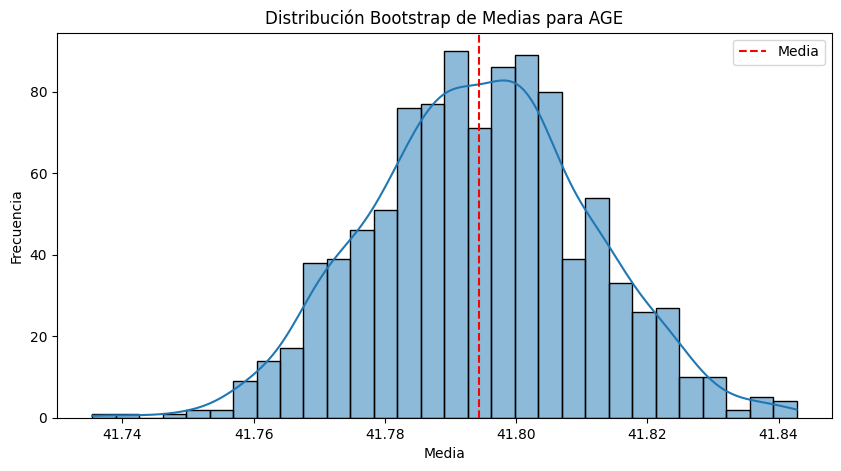


Resultados de Bootstrap para PREGNANT:
Asimetría: -0.12, Curtosis: 0.38


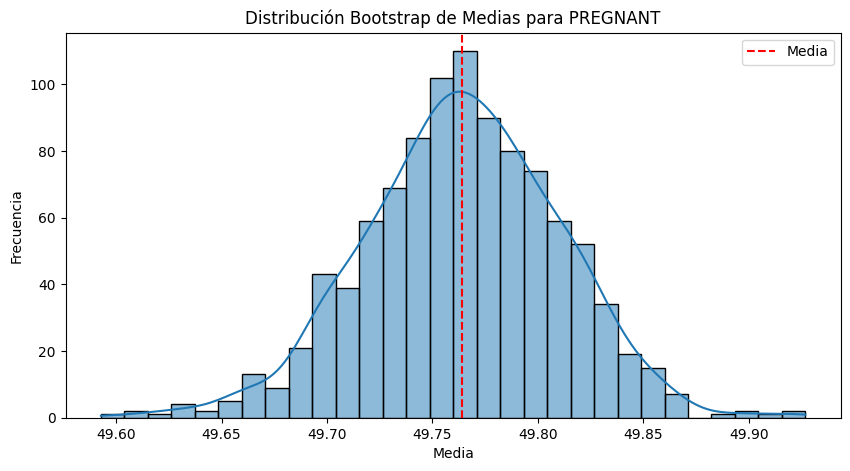


Resultados de Bootstrap para DIABETES:
Asimetría: -0.01, Curtosis: -0.11


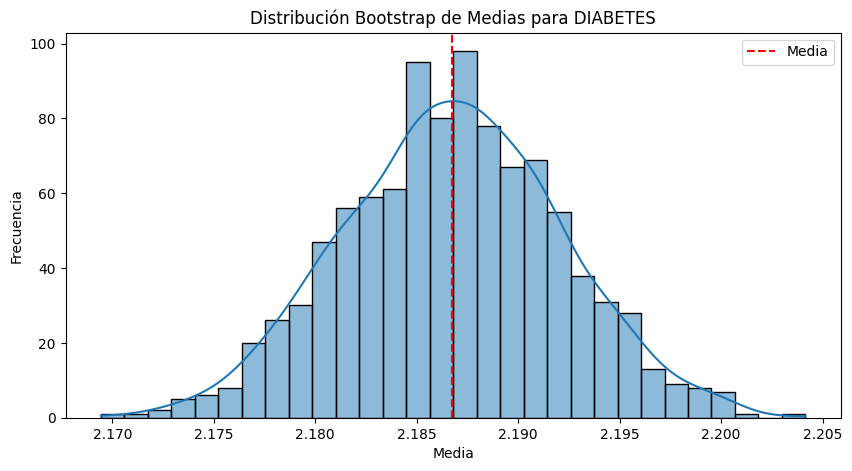


Resultados de Bootstrap para COPD:
Asimetría: -0.08, Curtosis: 0.02


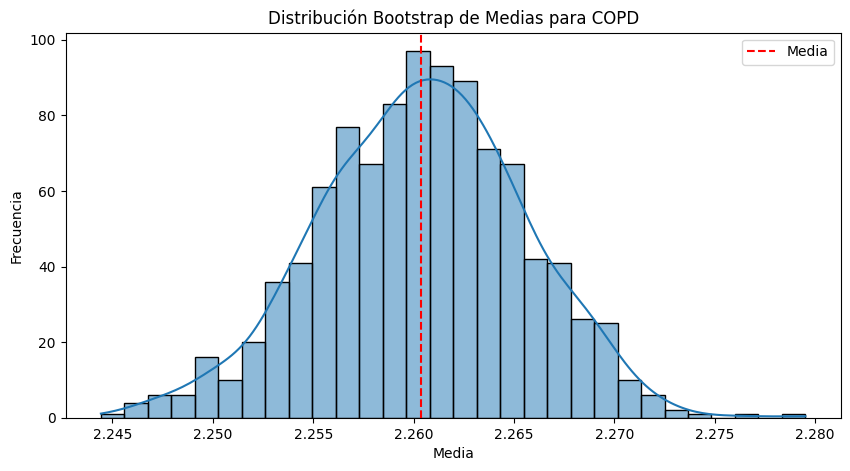


Resultados de Bootstrap para ASTHMA:
Asimetría: 0.10, Curtosis: -0.04


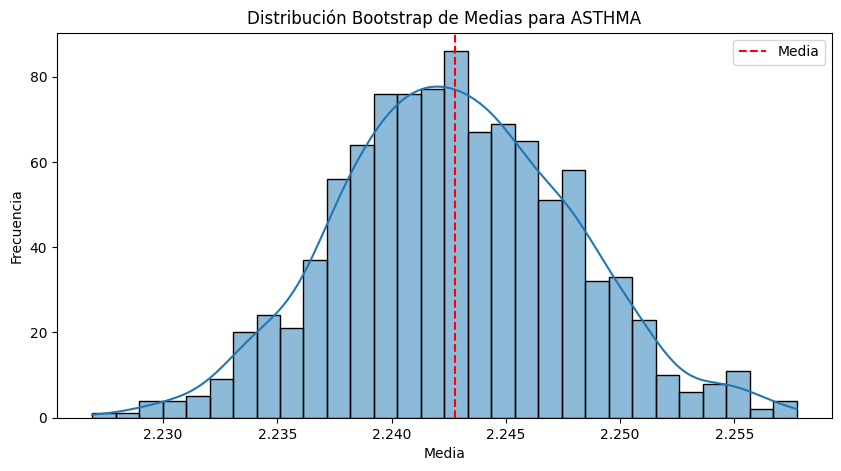


Resultados de Bootstrap para INMSUPR:
Asimetría: -0.01, Curtosis: 0.03


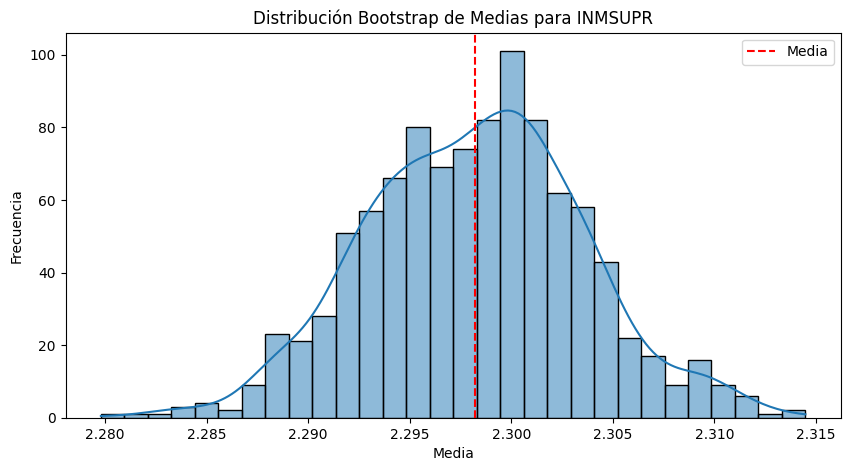


Resultados de Bootstrap para HIPERTENSION:
Asimetría: 0.05, Curtosis: -0.29


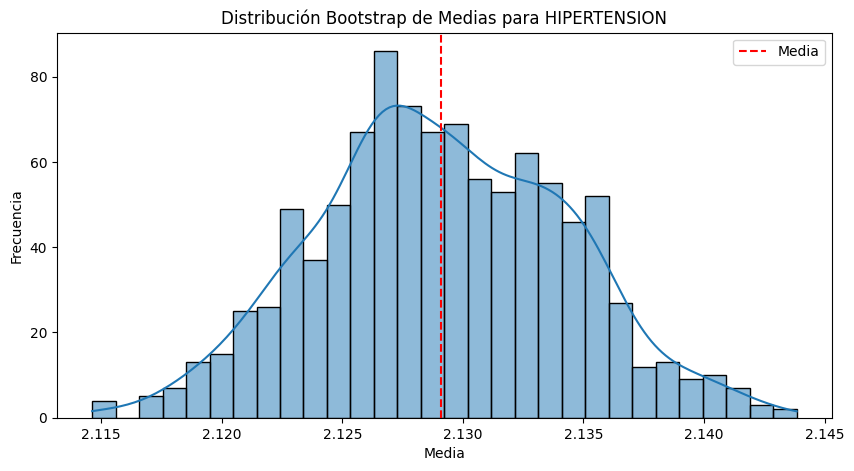


Resultados de Bootstrap para OTHER_DISEASE:
Asimetría: 0.01, Curtosis: -0.16


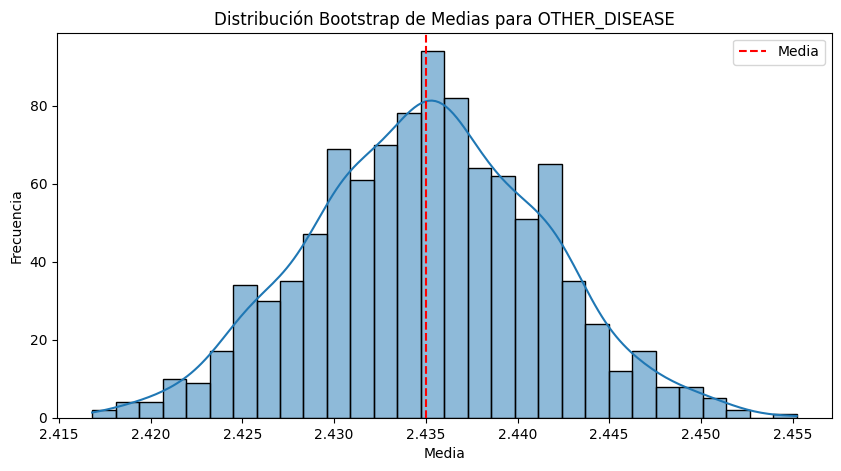


Resultados de Bootstrap para CARDIOVASCULAR:
Asimetría: 0.12, Curtosis: 0.16


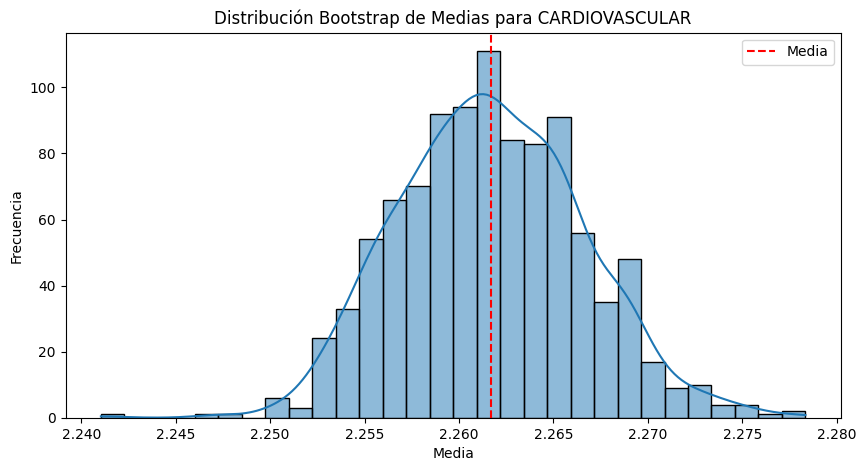


Resultados de Bootstrap para OBESITY:
Asimetría: 0.05, Curtosis: 0.12


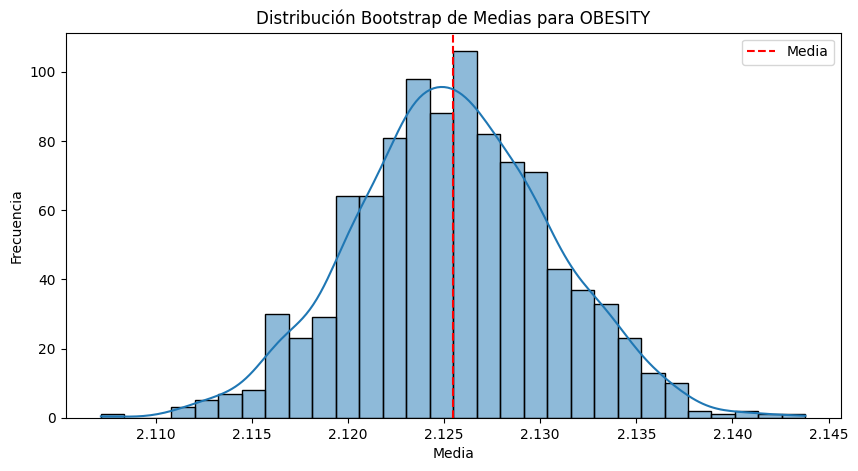


Resultados de Bootstrap para RENAL_CHRONIC:
Asimetría: 0.01, Curtosis: -0.00


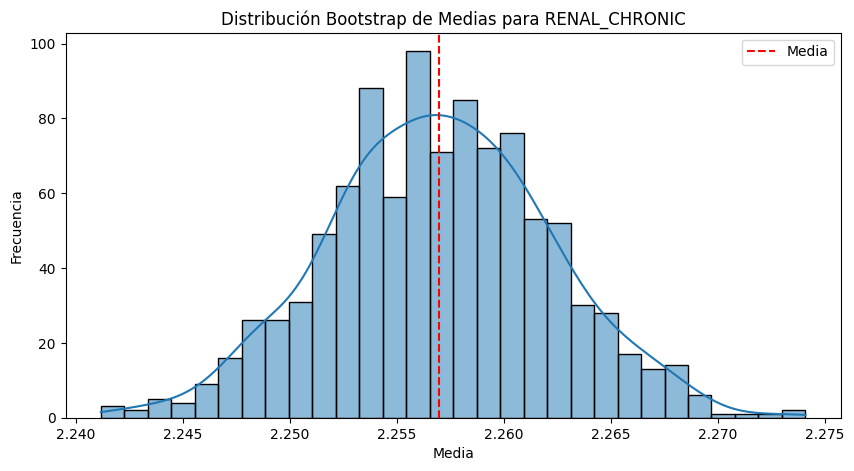


Resultados de Bootstrap para TOBACCO:
Asimetría: 0.09, Curtosis: -0.04


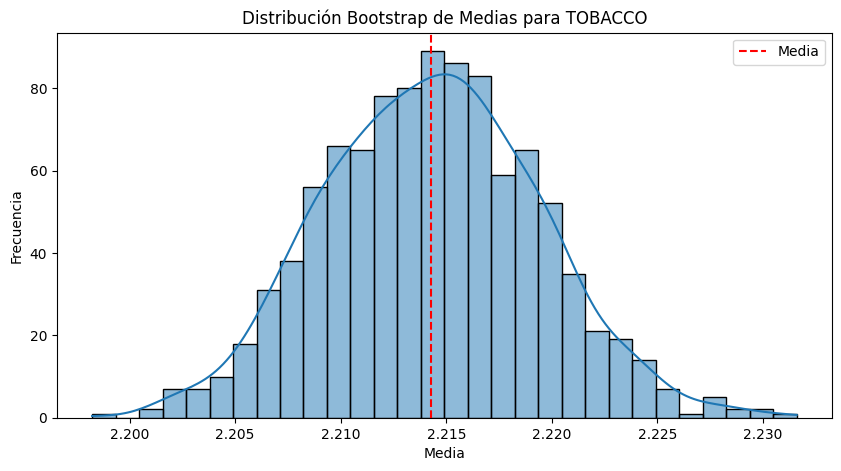


Resultados de Bootstrap para CLASIFFICATION_FINAL:
Asimetría: 0.01, Curtosis: 0.26


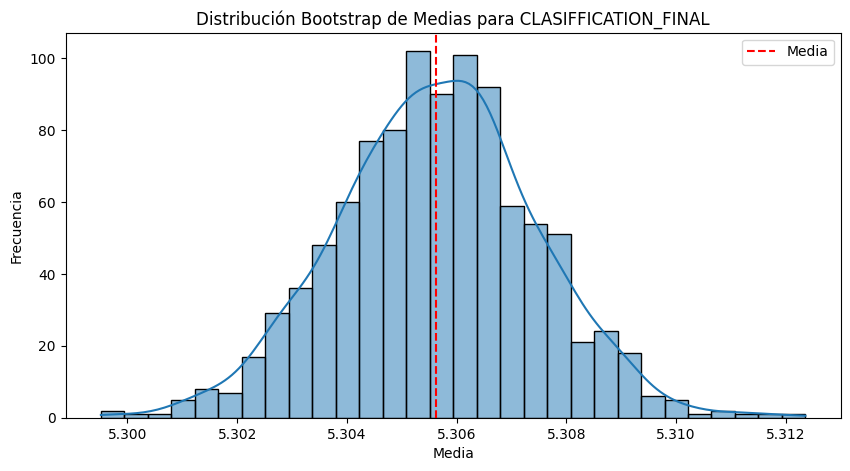


Resultados de Bootstrap para ICU:
Asimetría: 0.07, Curtosis: -0.01


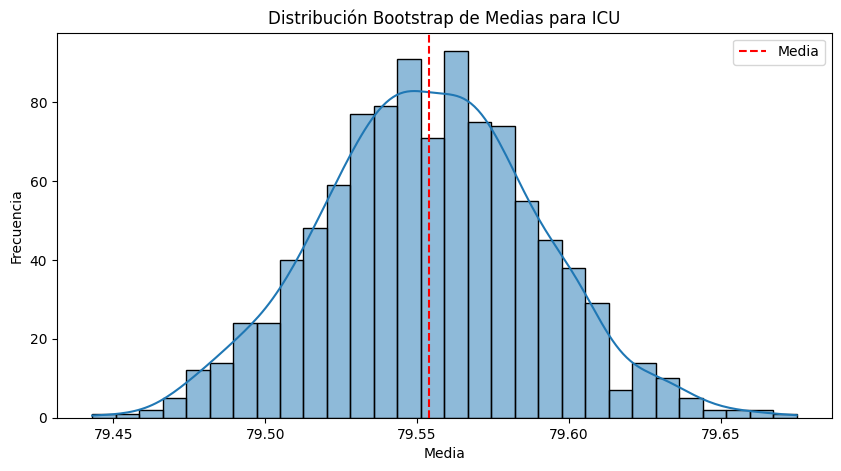

In [ ]:

# Variables numéricas
numerical_vars = df.select_dtypes(include=['number']).columns

# Almacenar resultados de bootstrap
bootstrap_results = {}

for variable in numerical_vars:
    data = df[variable].dropna().values
    boot_means = bootstrap(data)

    # Calcular asimetría y curtosis
    skewness = pd.Series(boot_means).skew()
    kurtosis = pd.Series(boot_means).kurtosis()

    bootstrap_results[variable] = {
        'boot_means': boot_means,
        'skewness': skewness,
        'kurtosis': kurtosis
    }

# Reportar resultados
for var, result in bootstrap_results.items():
    print(f"\nResultados de Bootstrap para {var}:")
    print(f"Asimetría: {result['skewness']:.2f}, Curtosis: {result['kurtosis']:.2f}")

    # Visualización
    plt.figure(figsize=(10, 5))
    sns.histplot(result['boot_means'], bins=30, kde=True)
    plt.title(f'Distribución Bootstrap de Medias para {var}')
    plt.xlabel('Media')
    plt.ylabel('Frecuencia')
    plt.axvline(np.mean(result['boot_means']), color='red', linestyle='--', label='Media')
    plt.legend()
    plt.show()



Resultados de Bootstrap para USMER:
Error Estándar: 0.00


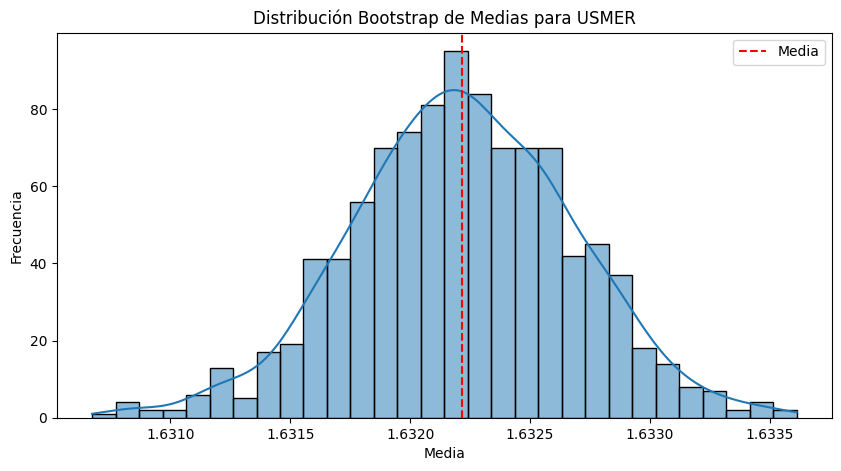


Resultados de Bootstrap para MEDICAL_UNIT:
Error Estándar: 0.00


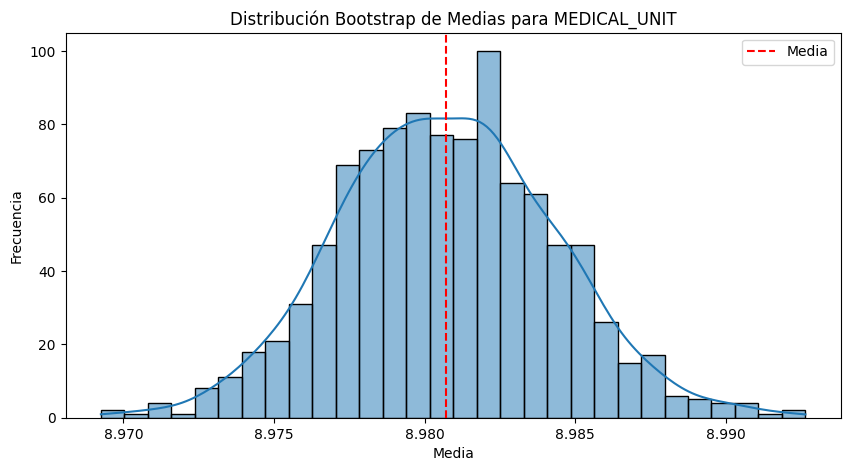


Resultados de Bootstrap para SEX:
Error Estándar: 0.00


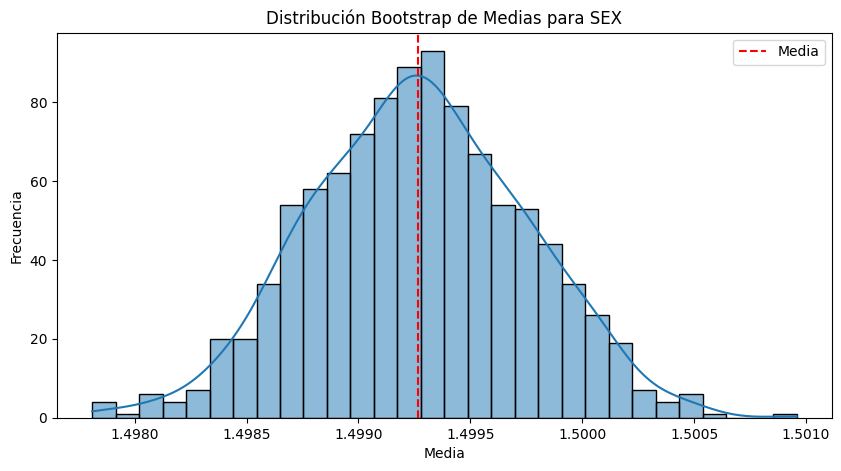


Resultados de Bootstrap para PATIENT_TYPE:
Error Estándar: 0.00


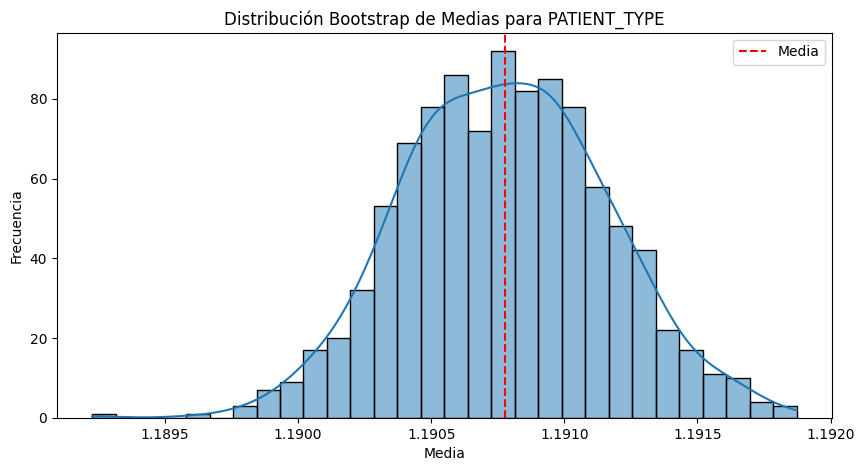


Resultados de Bootstrap para INTUBED:
Error Estándar: 0.04


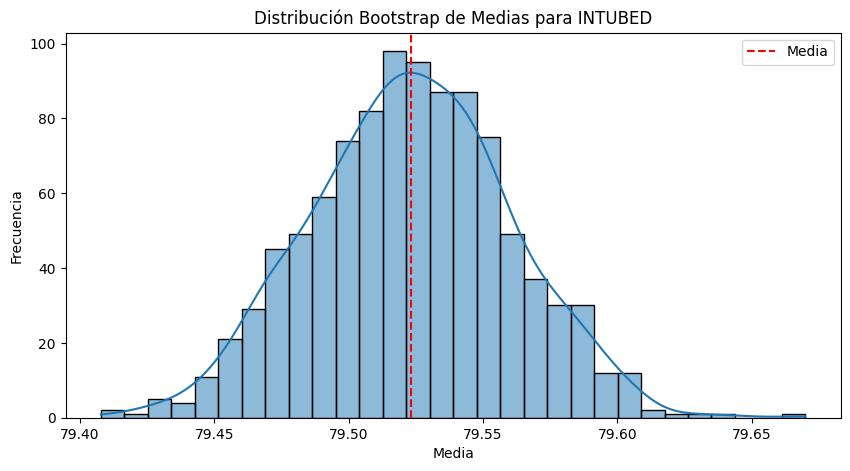


Resultados de Bootstrap para PNEUMONIA:
Error Estándar: 0.01


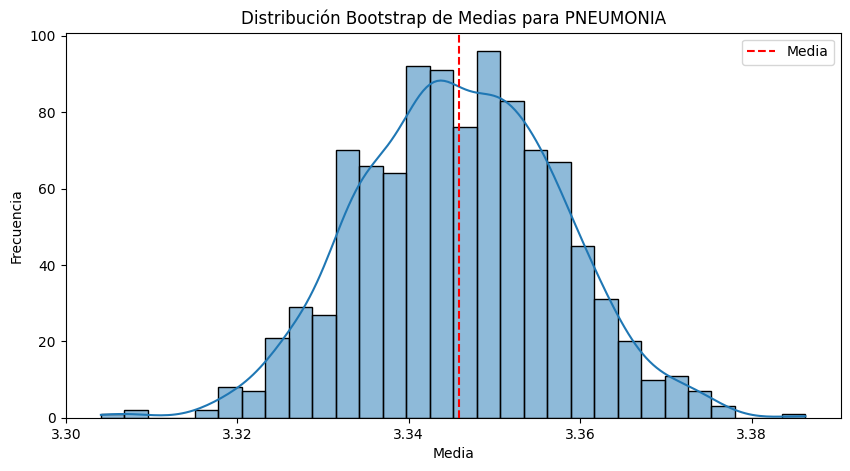


Resultados de Bootstrap para AGE:
Error Estándar: 0.02


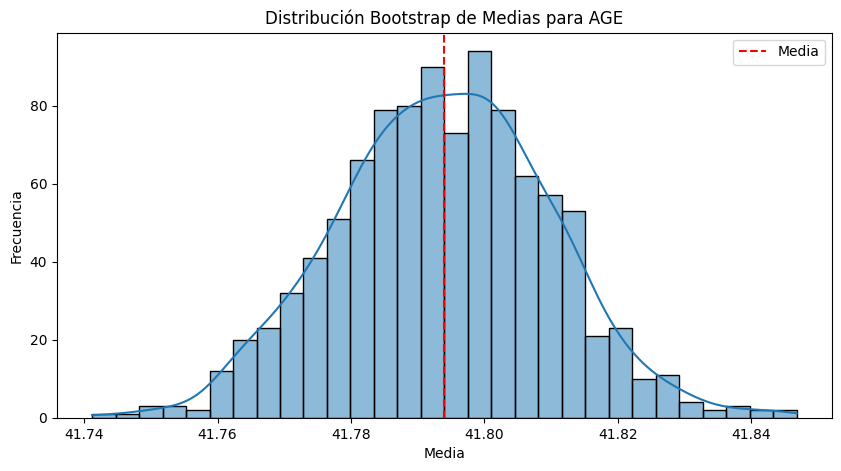


Resultados de Bootstrap para PREGNANT:
Error Estándar: 0.05


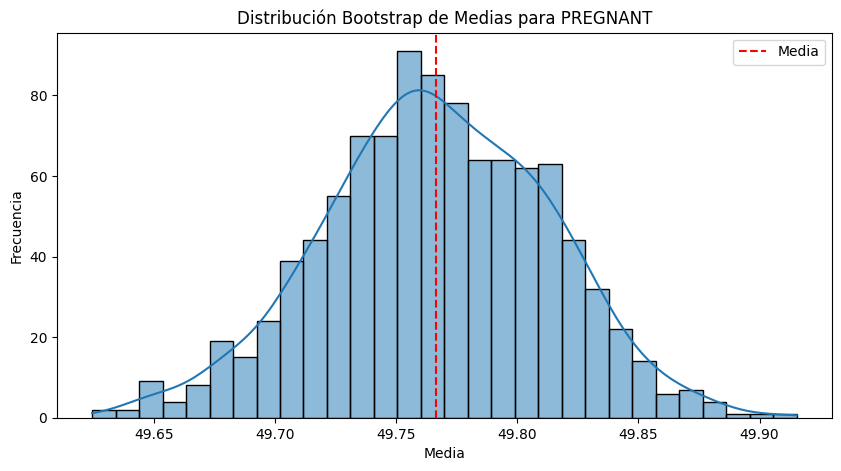


Resultados de Bootstrap para DIABETES:
Error Estándar: 0.01


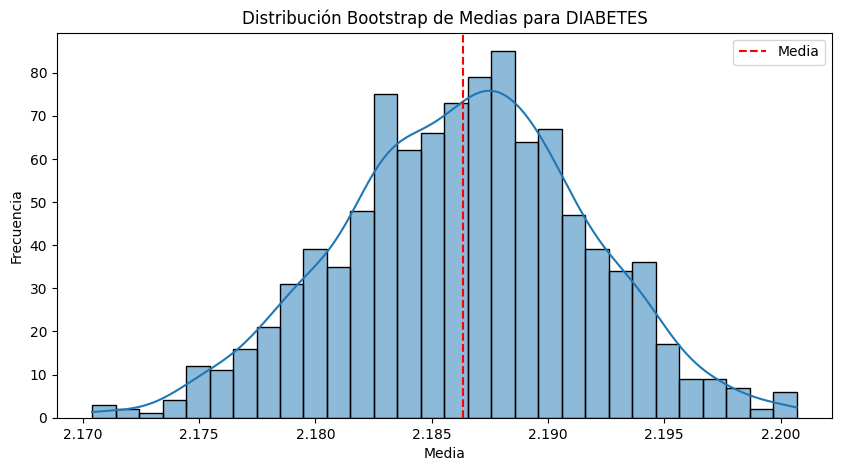


Resultados de Bootstrap para COPD:
Error Estándar: 0.00


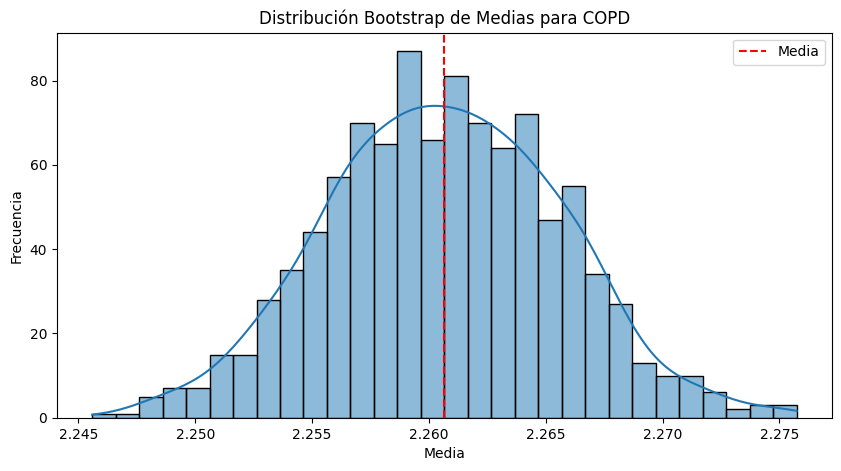


Resultados de Bootstrap para ASTHMA:
Error Estándar: 0.00


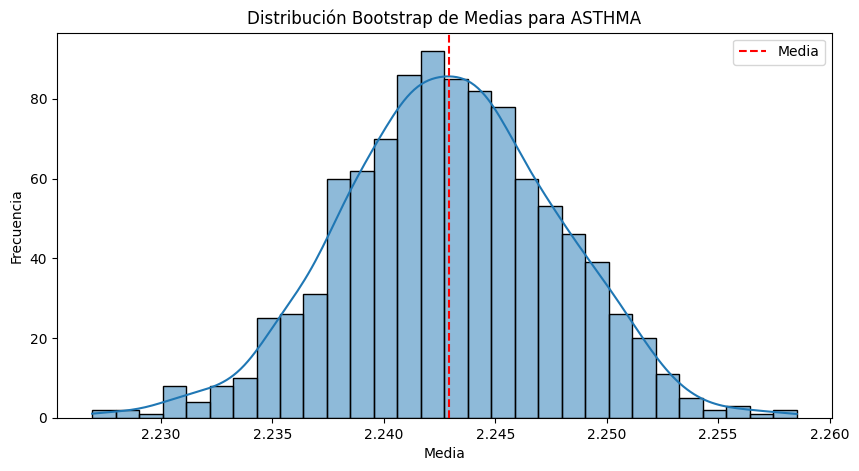


Resultados de Bootstrap para INMSUPR:
Error Estándar: 0.01


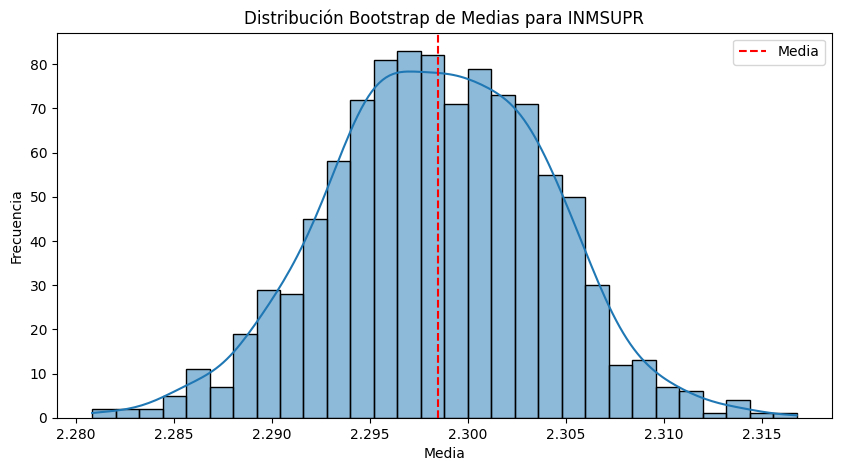


Resultados de Bootstrap para HIPERTENSION:
Error Estándar: 0.01


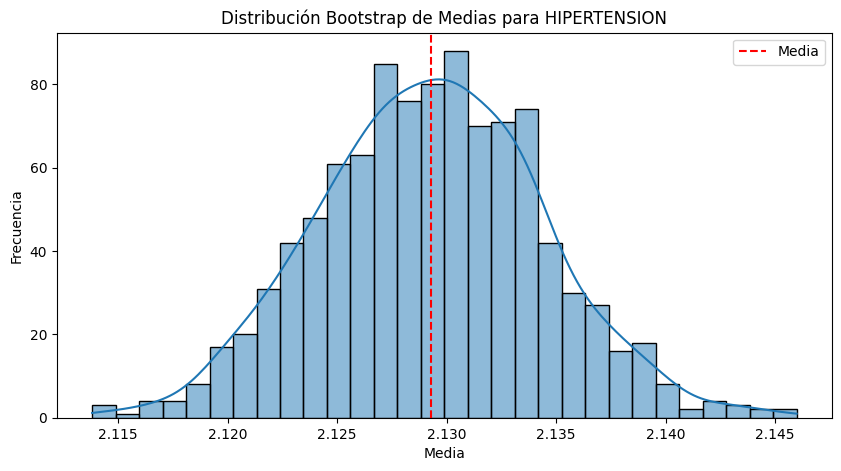


Resultados de Bootstrap para OTHER_DISEASE:
Error Estándar: 0.01


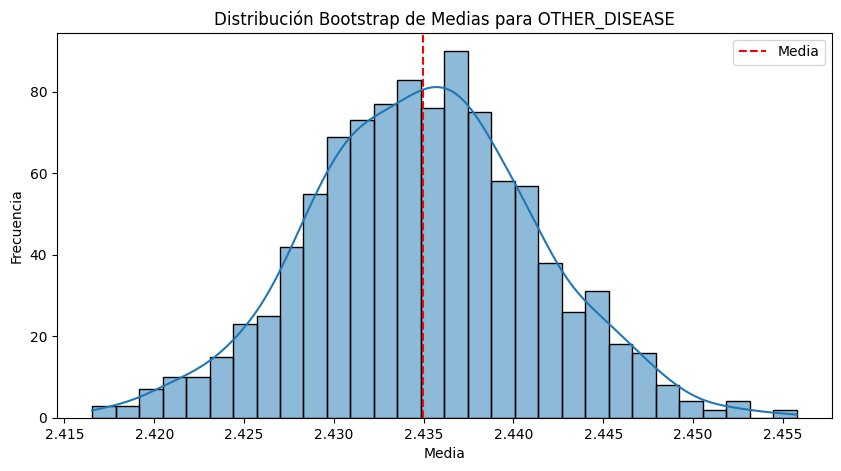


Resultados de Bootstrap para CARDIOVASCULAR:
Error Estándar: 0.01


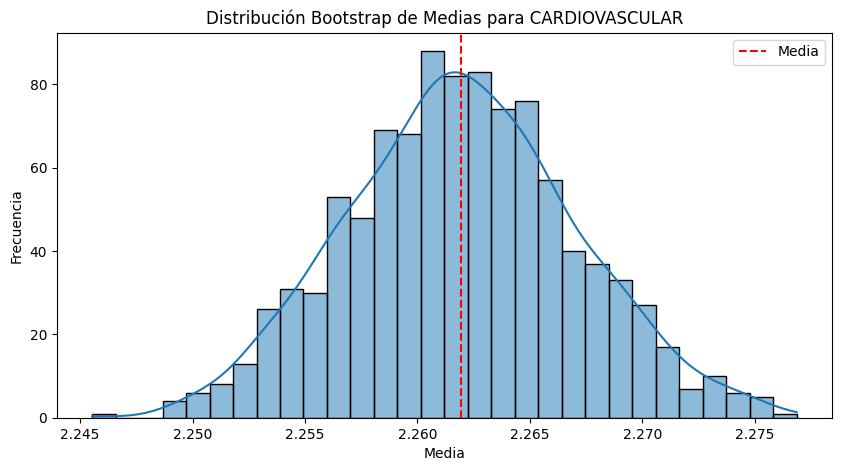


Resultados de Bootstrap para OBESITY:
Error Estándar: 0.01


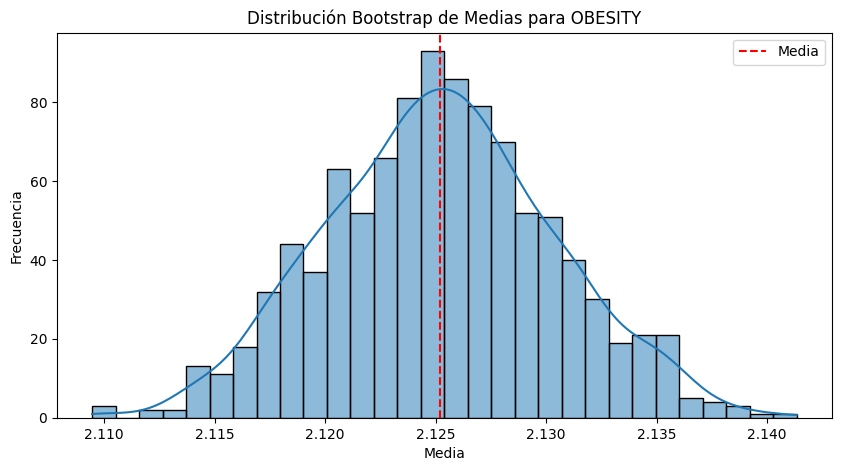


Resultados de Bootstrap para RENAL_CHRONIC:
Error Estándar: 0.01


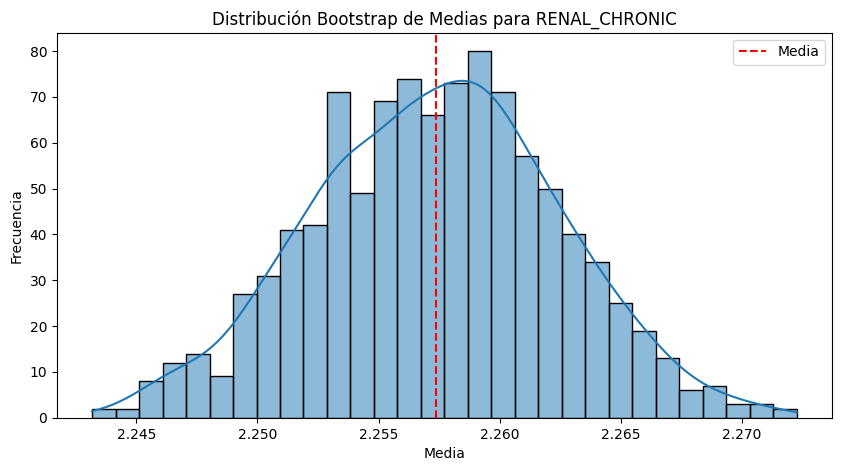


Resultados de Bootstrap para TOBACCO:
Error Estándar: 0.01


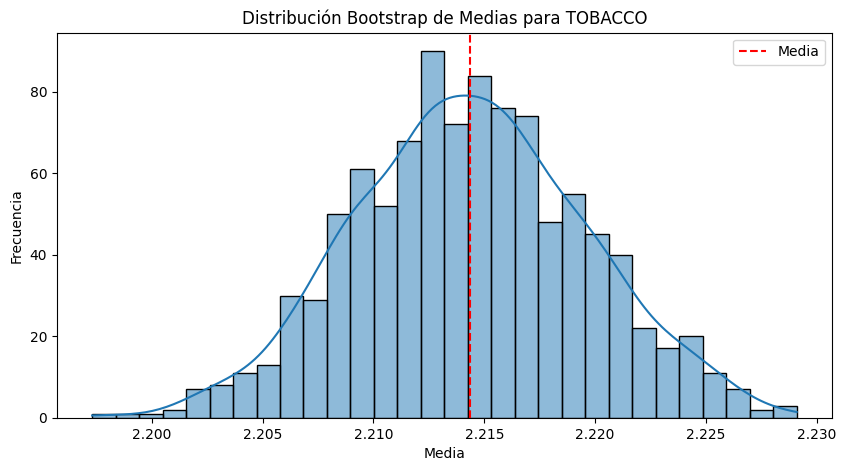


Resultados de Bootstrap para CLASIFFICATION_FINAL:
Error Estándar: 0.00


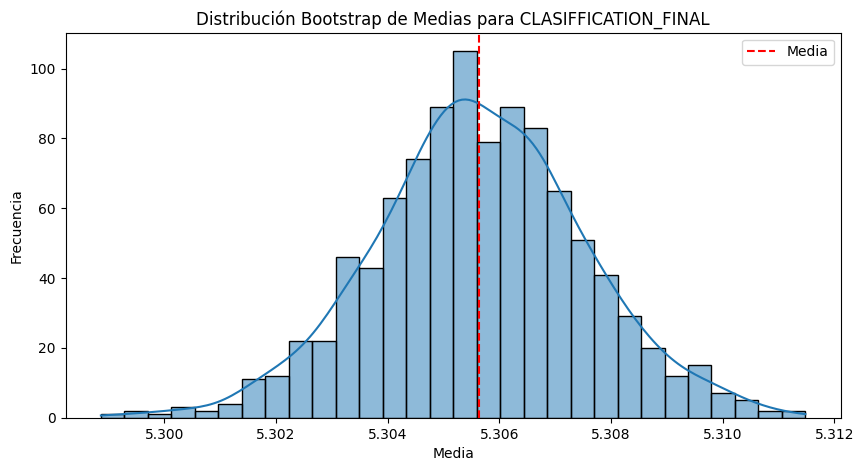


Resultados de Bootstrap para ICU:
Error Estándar: 0.04


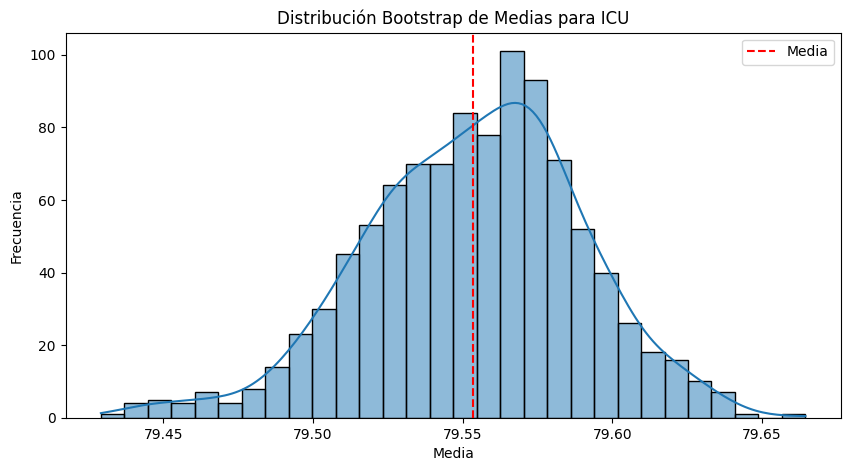

In [ ]:


for variable in numerical_vars:
    data = df[variable].dropna().values
    boot_means = bootstrap(data)

    # Calcular error estándar
    error_std = np.std(boot_means)

    # Almacenar resultados
    bootstrap_results[variable] = {
        'boot_means': boot_means,
        'error_std': error_std
    }

# Reportar resultados
for var, result in bootstrap_results.items():
    print(f"\nResultados de Bootstrap para {var}:")
    print(f"Error Estándar: {result['error_std']:.2f}")

    # Visualización
    plt.figure(figsize=(10, 5))
    sns.histplot(result['boot_means'], bins=30, kde=True)
    plt.title(f'Distribución Bootstrap de Medias para {var}')
    plt.xlabel('Media')
    plt.ylabel('Frecuencia')
    plt.axvline(np.mean(result['boot_means']), color='red', linestyle='--', label='Media')
    plt.legend()
    plt.show()



Resultados de Bootstrap para USMER:
Intervalo de Confianza (95%): (1.6312450706911763, 1.6331559258994348)


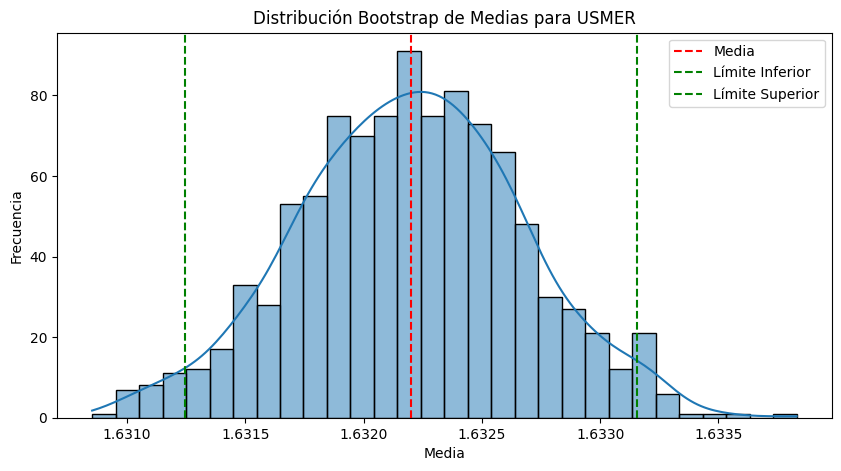


Resultados de Bootstrap para MEDICAL_UNIT:
Intervalo de Confianza (95%): (8.973171685382543, 8.987652456905801)


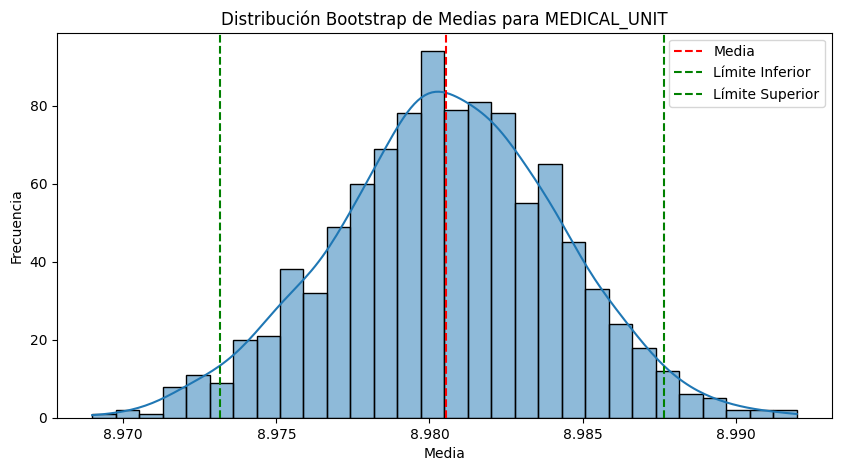


Resultados de Bootstrap para SEX:
Intervalo de Confianza (95%): (1.4983247740981809, 1.5001979829768972)


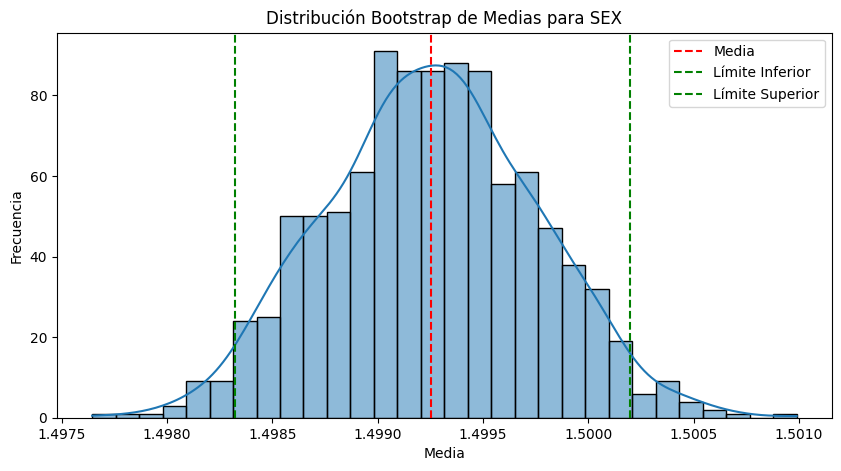


Resultados de Bootstrap para PATIENT_TYPE:
Intervalo de Confianza (95%): (1.190029969243974, 1.1914944567627495)


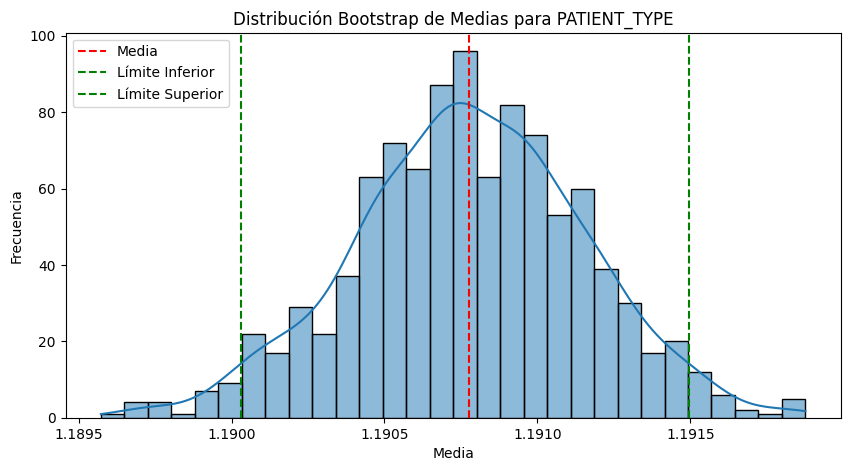


Resultados de Bootstrap para INTUBED:
Intervalo de Confianza (95%): (79.4513394130129, 79.594082302172)


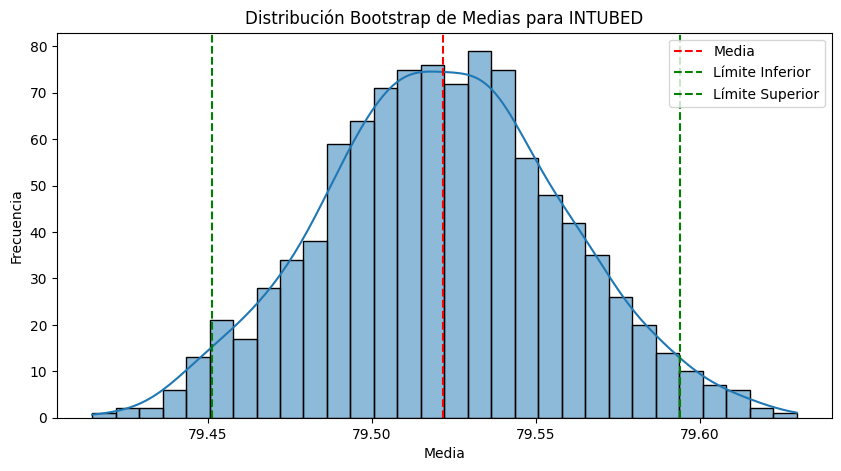


Resultados de Bootstrap para PNEUMONIA:
Intervalo de Confianza (95%): (3.325469541997473, 3.3690026941325133)


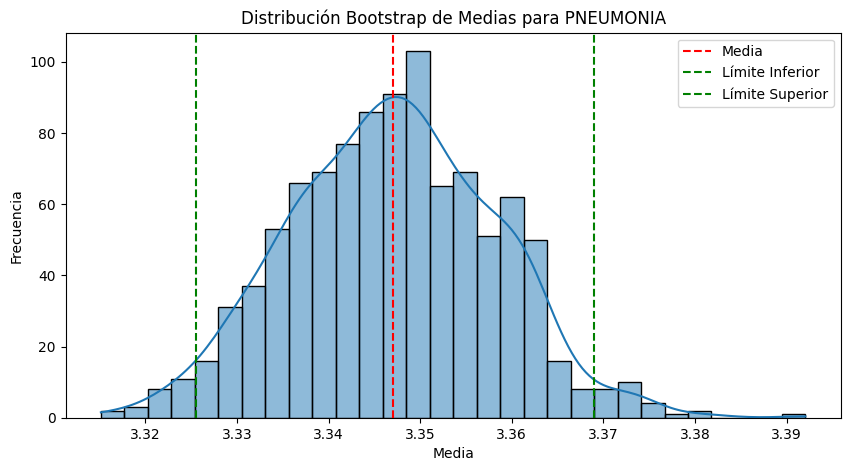


Resultados de Bootstrap para AGE:
Intervalo de Confianza (95%): (41.76227897384546, 41.829092649548194)


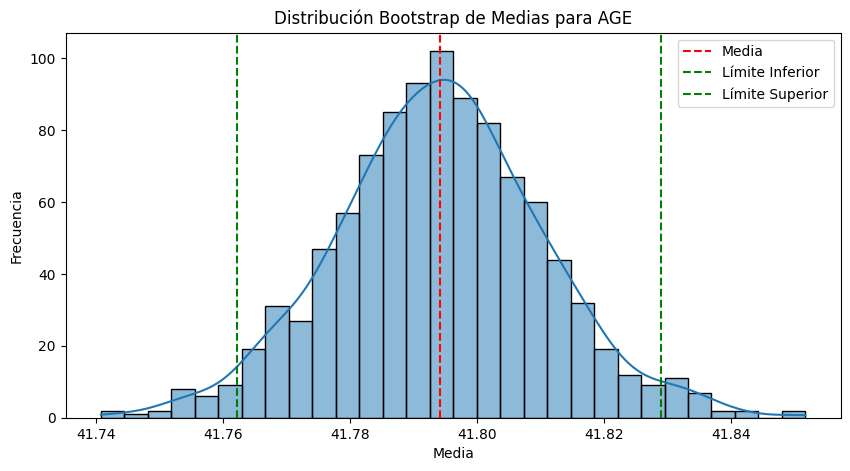


Resultados de Bootstrap para PREGNANT:
Intervalo de Confianza (95%): (49.67358689173402, 49.8605941873495)


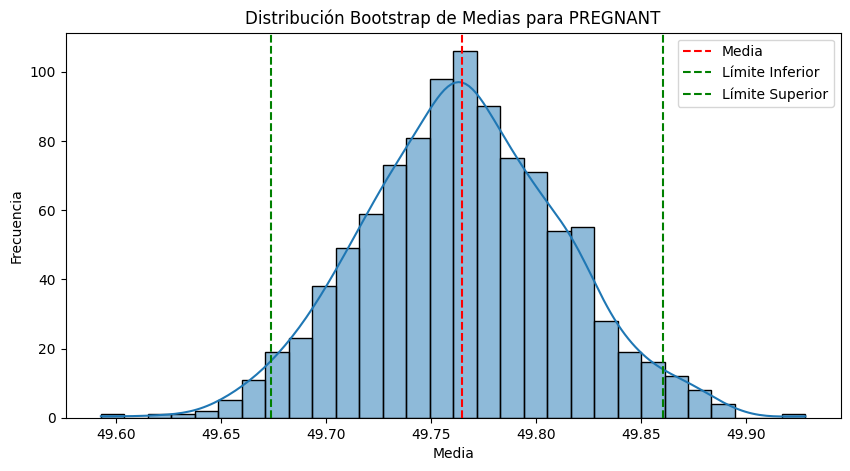


Resultados de Bootstrap para DIABETES:
Intervalo de Confianza (95%): (2.175945044465107, 2.1969272822640247)


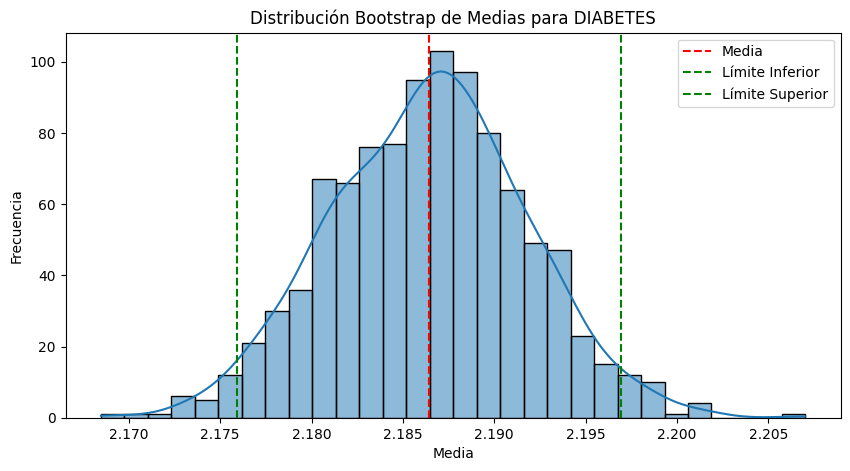


Resultados de Bootstrap para COPD:
Intervalo de Confianza (95%): (2.251072455475288, 2.2712849104737383)


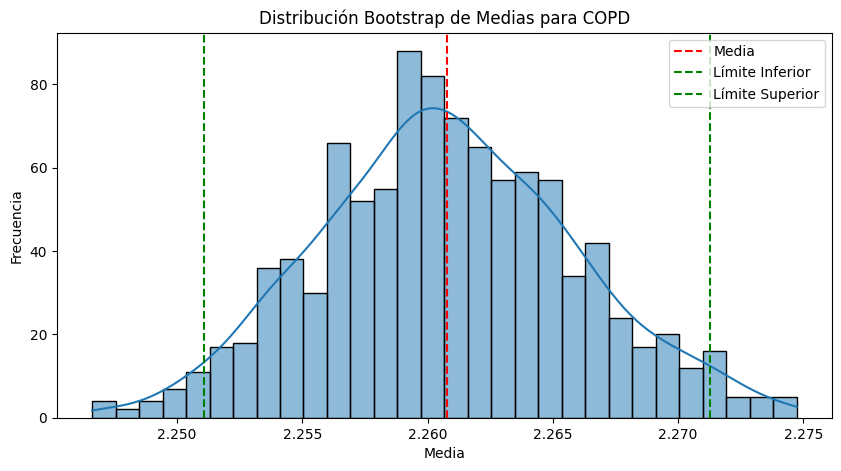


Resultados de Bootstrap para ASTHMA:
Intervalo de Confianza (95%): (2.2325620723362656, 2.252044846577498)


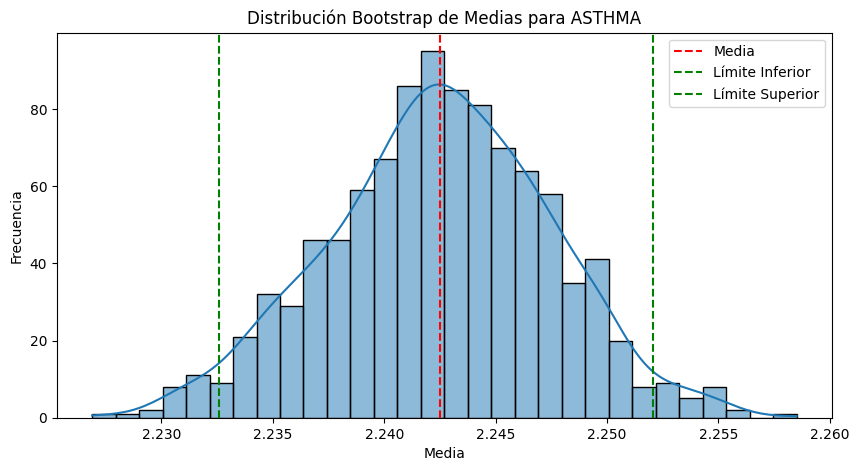


Resultados de Bootstrap para INMSUPR:
Intervalo de Confianza (95%): (2.287659943256324, 2.308749684095081)


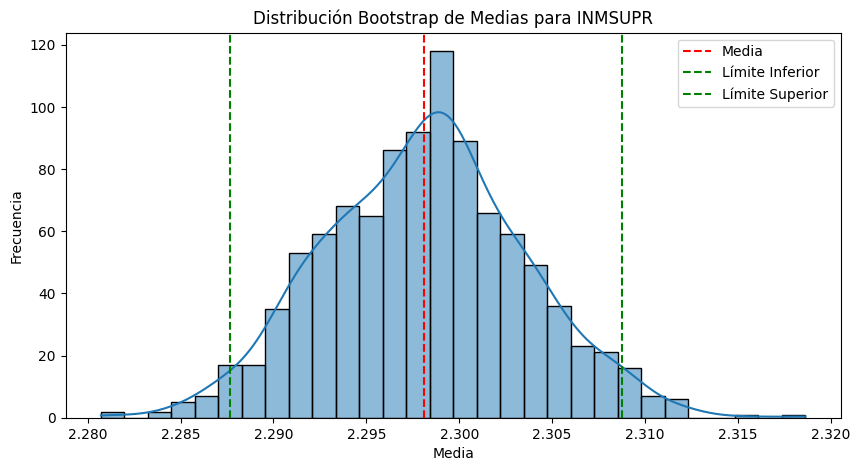


Resultados de Bootstrap para HIPERTENSION:
Intervalo de Confianza (95%): (2.1192549173878836, 2.139122857210977)


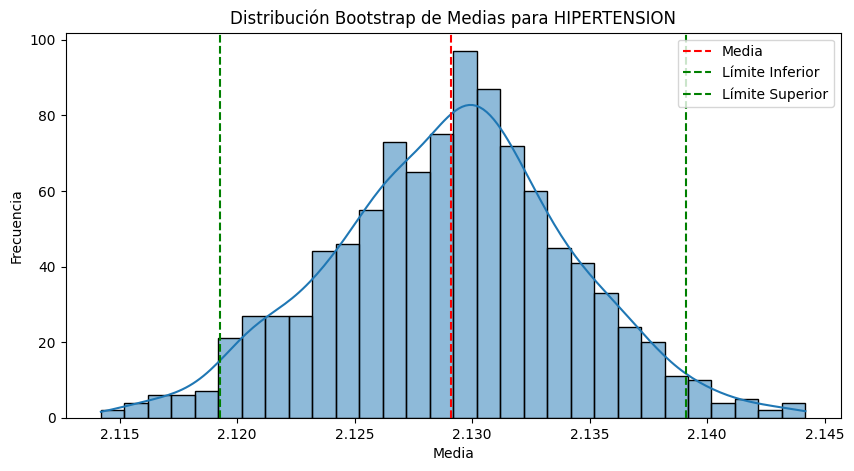


Resultados de Bootstrap para OTHER_DISEASE:
Intervalo de Confianza (95%): (2.4218422382757554, 2.4474863266814486)


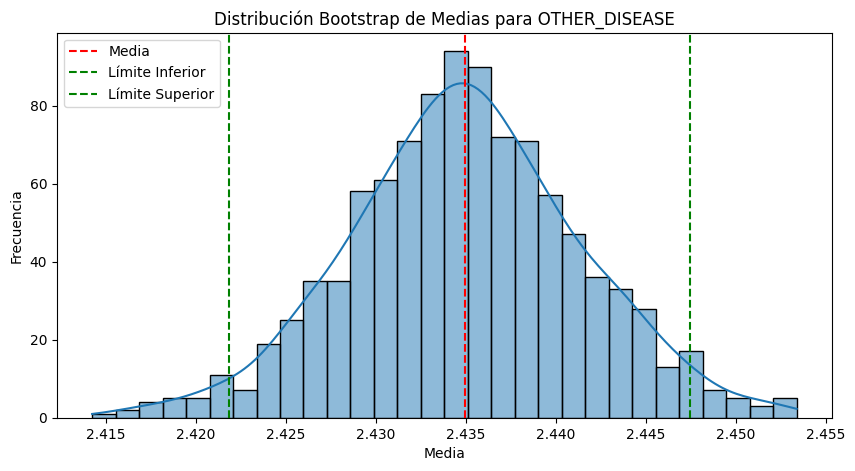


Resultados de Bootstrap para CARDIOVASCULAR:
Intervalo de Confianza (95%): (2.252032329590158, 2.271857973916983)


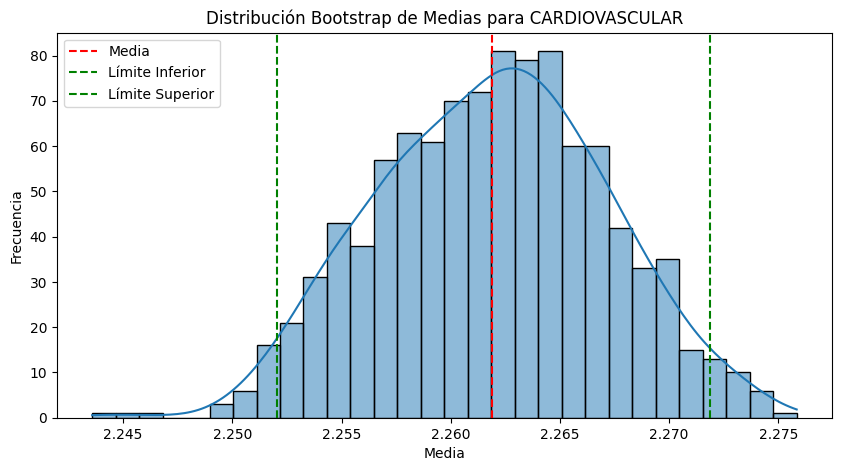


Resultados de Bootstrap para OBESITY:
Intervalo de Confianza (95%): (2.1152431633407245, 2.1356662375128153)


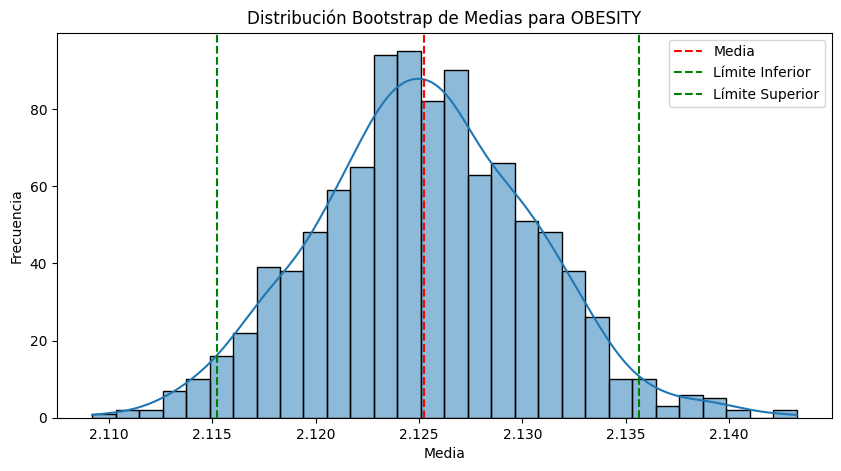


Resultados de Bootstrap para RENAL_CHRONIC:
Intervalo de Confianza (95%): (2.247681639367713, 2.2674127506377704)


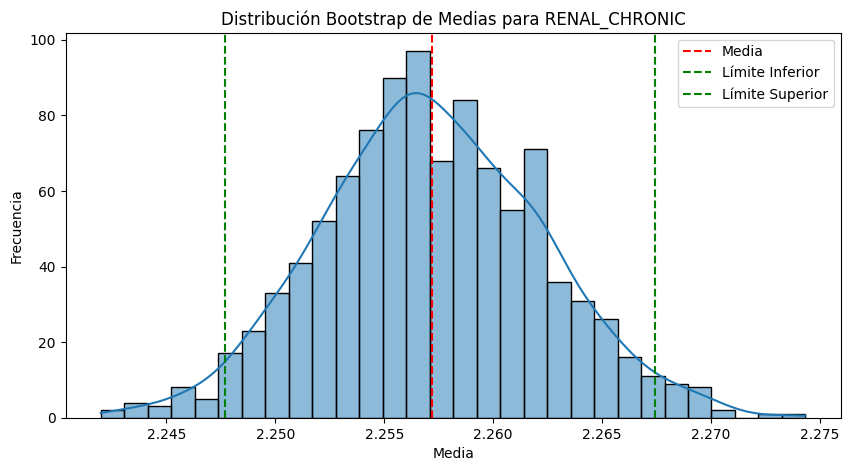


Resultados de Bootstrap para TOBACCO:
Intervalo de Confianza (95%): (2.204150299215602, 2.2252206089216315)


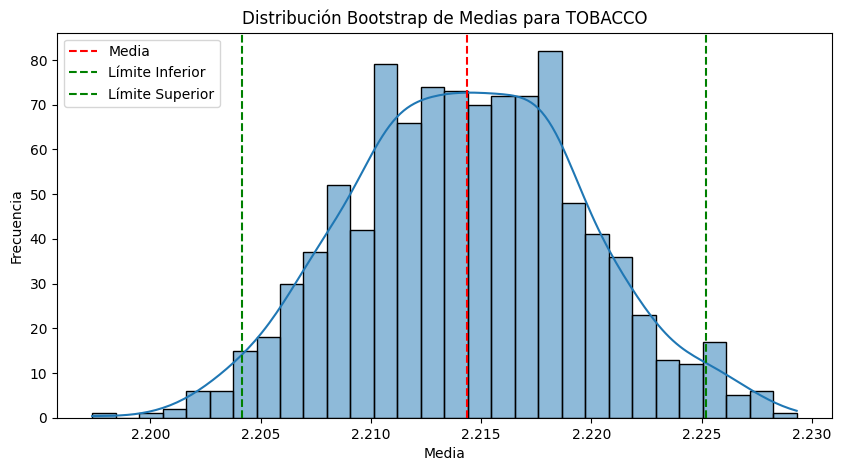


Resultados de Bootstrap para CLASIFFICATION_FINAL:
Intervalo de Confianza (95%): (5.301760818253344, 5.309161528741387)


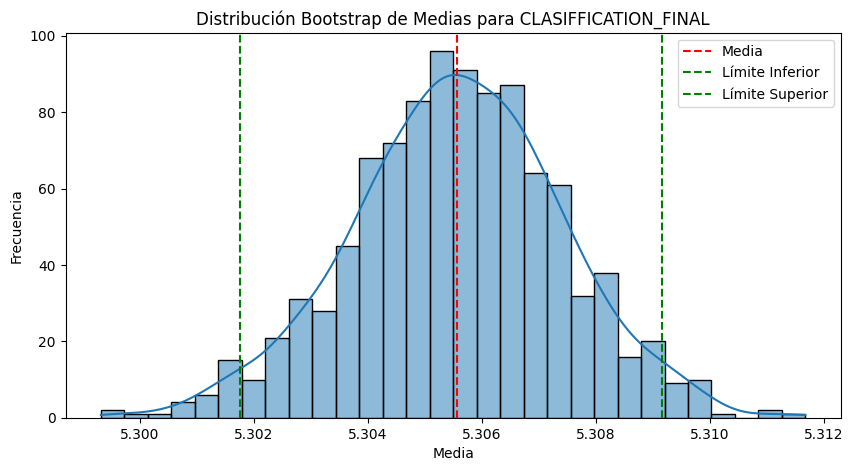


Resultados de Bootstrap para ICU:
Intervalo de Confianza (95%): (79.48585077366903, 79.6225274062418)


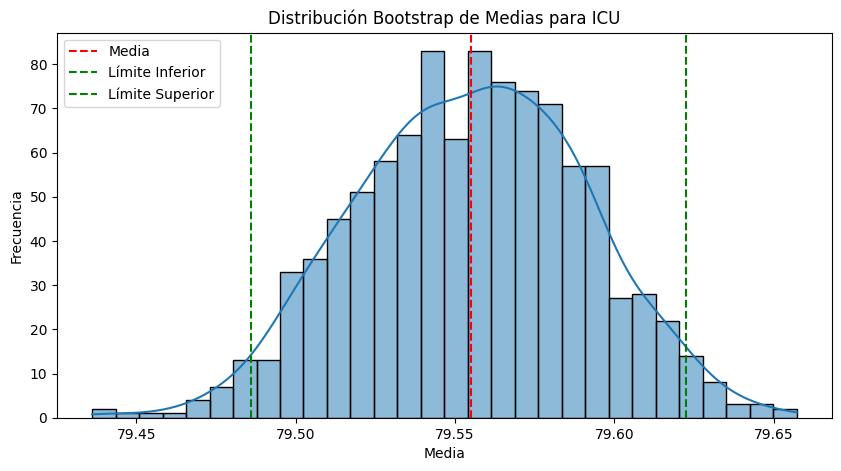

In [ ]:
#c
for variable in numerical_vars:
    data = df[variable].dropna().values
    boot_means = bootstrap(data)

    # Calcular intervalo de confianza
    ci_lower = np.percentile(boot_means, 2.5)
    ci_upper = np.percentile(boot_means, 97.5)

    # Almacenar resultados
    bootstrap_results[variable] = {
        'boot_means': boot_means,
        'confidence_interval': (ci_lower, ci_upper)
    }

# Reportar resultados
for var, result in bootstrap_results.items():
    print(f"\nResultados de Bootstrap para {var}:")
    print(f"Intervalo de Confianza (95%): {result['confidence_interval']}")

    # Visualización
    plt.figure(figsize=(10, 5))
    sns.histplot(result['boot_means'], bins=30, kde=True)
    plt.title(f'Distribución Bootstrap de Medias para {var}')
    plt.xlabel('Media')
    plt.ylabel('Frecuencia')
    plt.axvline(np.mean(result['boot_means']), color='red', linestyle='--', label='Media')
    plt.axvline(result['confidence_interval'][0], color='green', linestyle='--', label='Límite Inferior')
    plt.axvline(result['confidence_interval'][1], color='green', linestyle='--', label='Límite Superior')
    plt.legend()
    plt.show()


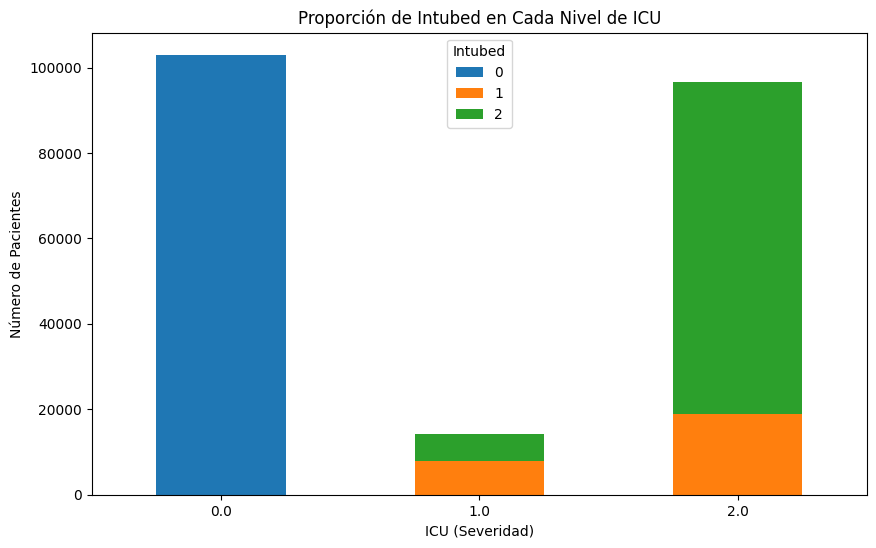

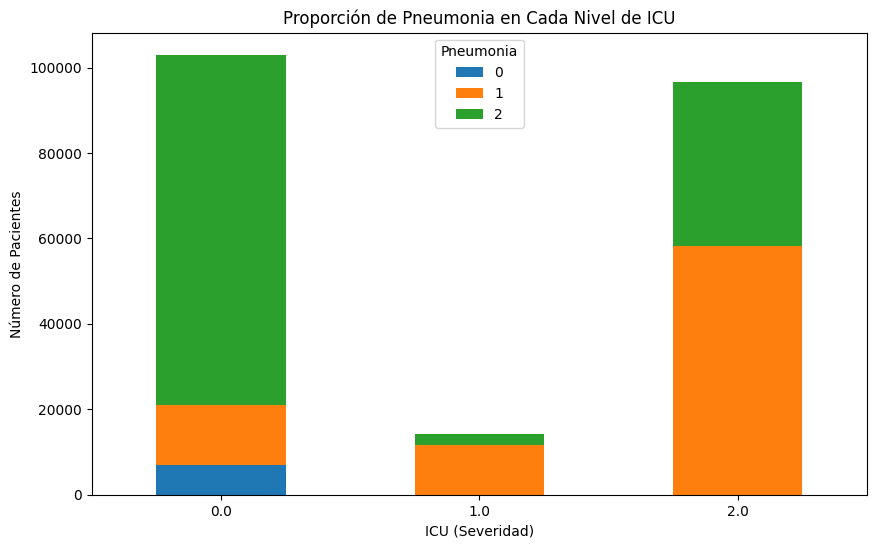

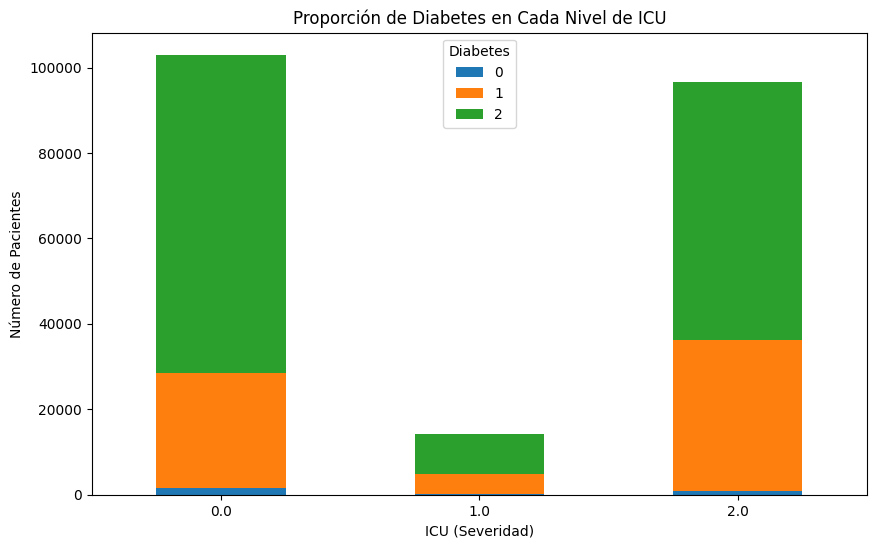

In [ ]:

# Tabla de frecuencias cruzadas para ICU y una condición médica (ej. intubed)
df1_numerico_copy['icu'] = df1_numerico_copy['icu'].astype(str)  # Asegurarse de que ICU es categórico

# Condiciones de salud agrupadas por niveles de ICU
condiciones = ['intubed', 'pneumonia', 'diabetes']  # selecciona las que prefieras analizar
for condicion in condiciones:
    # Crear tabla de frecuencias
    tabla_frecuencias = pd.crosstab(df1_numerico_copy['icu'], df1_numerico_copy[condicion])

    # Crear gráfico de barras apiladas
    tabla_frecuencias.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f'Proporción de {condicion.capitalize()} en Cada Nivel de ICU')
    plt.xlabel('ICU (Severidad)')
    plt.ylabel('Número de Pacientes')
    plt.legend(title=condicion.capitalize())
    plt.xticks(rotation=0)
    plt.show()


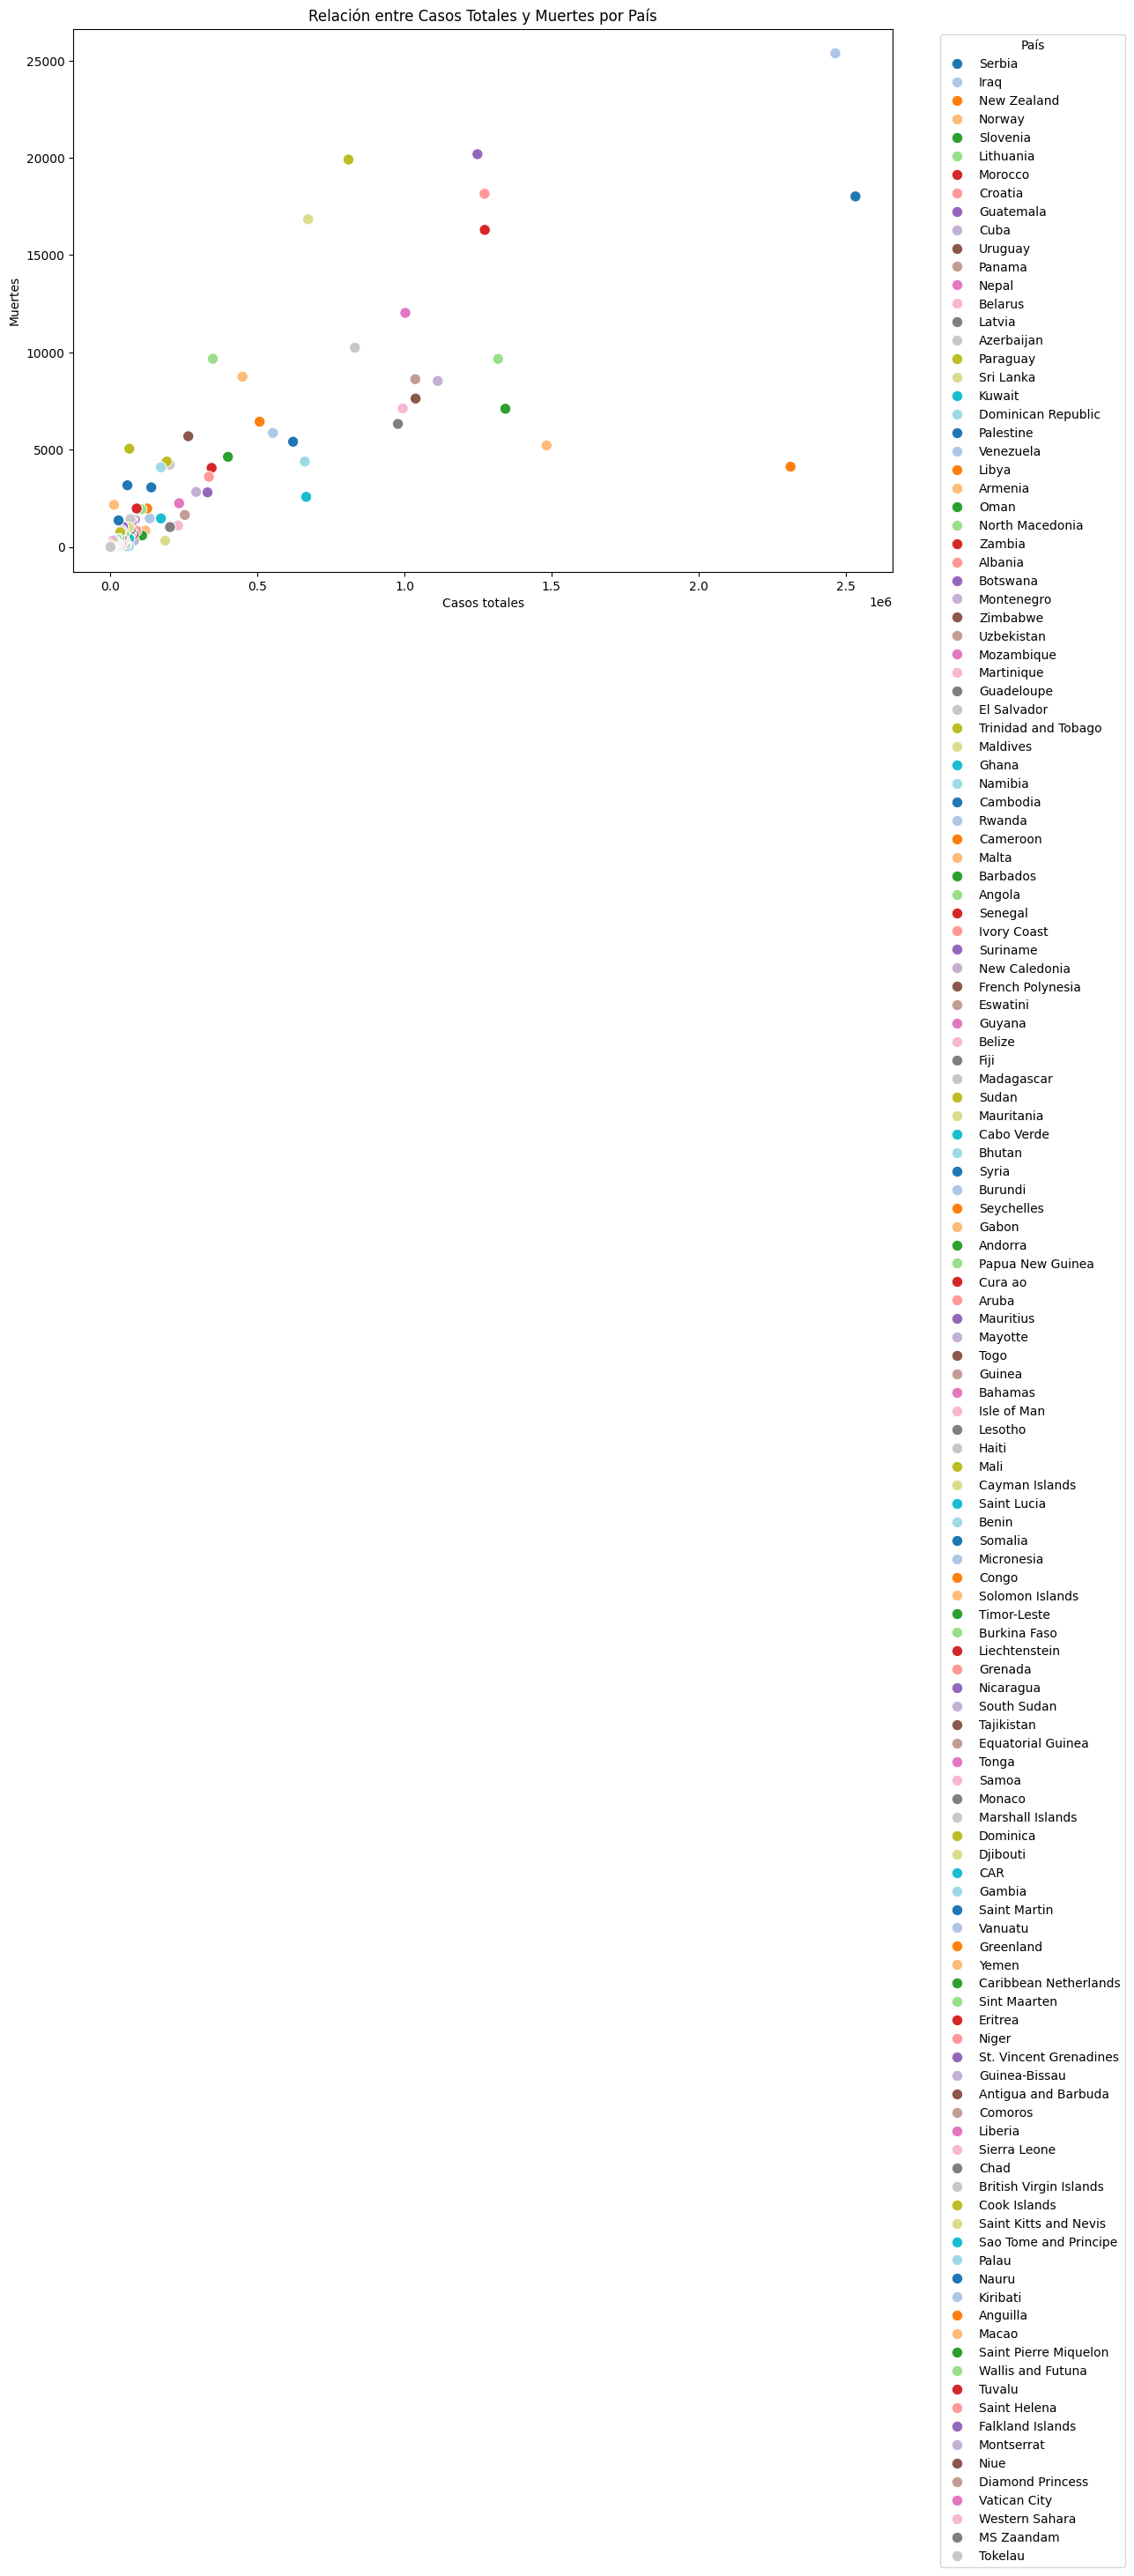

In [ ]:
# Scatterplot con leyenda para todos los países
plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(data=df2_filtrado, x='total_cases', y='total_deaths', hue='country_other', palette='tab20', s=80)
plt.title('Relación entre Casos Totales y Muertes por País')
plt.xlabel('Casos totales')
plt.ylabel('Muertes')

# Mostrar la leyenda completa
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='País')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

categorical_columns = ['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnant',
                       'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension',
                       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
                       'tobacco', 'clasiffication_final','icu']

# Separar en variables predictoras (X) y variable objetivo (y)
X = df1_numerico_copy.drop(columns=['icu','date_died'], axis=1)
y = df1_numerico_copy['icu']  # Cambia esto si tu variable objetivo es otra

# Dividimos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Exactitud del modelo: 0.91


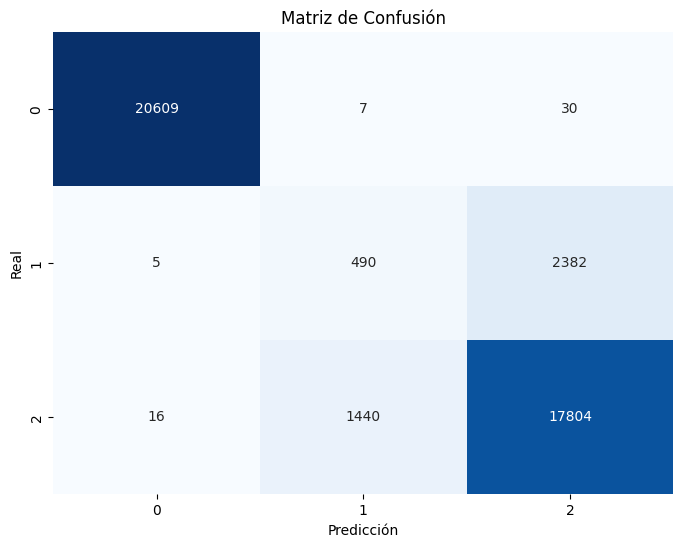

In [ ]:
# Entrenar el modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Calcular la exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")

# Matriz de Confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
# Reporte de Clasificación
class_report = classification_report(y_test, y_pred,output_dict=True)
class_report = pd.DataFrame(class_report).transpose()
print("Reporte de Clasificación:")
display(class_report)

Reporte de Clasificación:


precision    recall  f1-score      support
0.0            0.998982  0.998208  0.998595  20646.00000
1.0            0.252969  0.170316  0.203573   2877.00000
2.0            0.880689  0.924403  0.902016  19260.00000
accuracy       0.909310  0.909310  0.909310      0.90931
macro avg      0.710880  0.697642  0.701395  42783.00000
weighted avg   0.895562  0.909310  0.901655  42783.00000

#Regresión logística

In [ ]:
# Entrenamiento del modelo
model_lr = LogisticRegression(max_iter=1000)  # Aumentamos iteraciones por estabilidad
model_lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = model_lr.predict(X_test)

# Evaluación
print("Exactitud de la Regresión Logística:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Exactitud de la Regresión Logística: 0.9321926933595119
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     20646
         1.0       0.60      0.01      0.02      2877
         2.0       0.87      1.00      0.93     19260

    accuracy                           0.93     42783
   macro avg       0.82      0.67      0.65     42783
weighted avg       0.91      0.93      0.90     42783



#K-Means

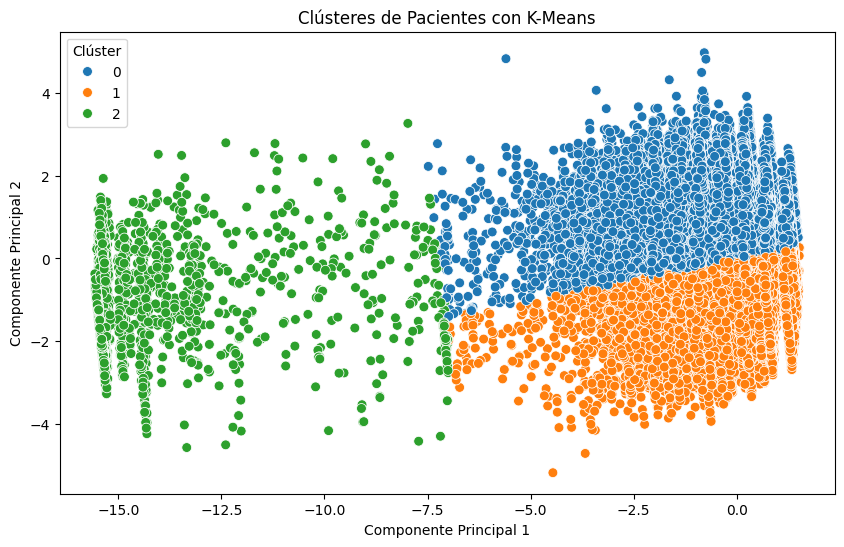

In [ ]:
from sklearn.preprocessing import StandardScaler
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Asegúrate de que 'X' sea tu matriz de características

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Seleccionar el número de clústeres con K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Visualización de resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette="tab10", s=50)
plt.title("Clústeres de Pacientes con K-Means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Clúster")
plt.show()

In [ ]:
# Ejemplo con la variable `diabetes`
pd.crosstab(df1_numerico_copy['pneumonia'], df1_numerico_copy['Cluster'], normalize='columns') * 100


Cluster            0          1          2
pneumonia                                 
0           2.288250   5.623403   2.588718
1          49.801125  25.780245  40.458421
2          47.910625  68.596352  56.952861

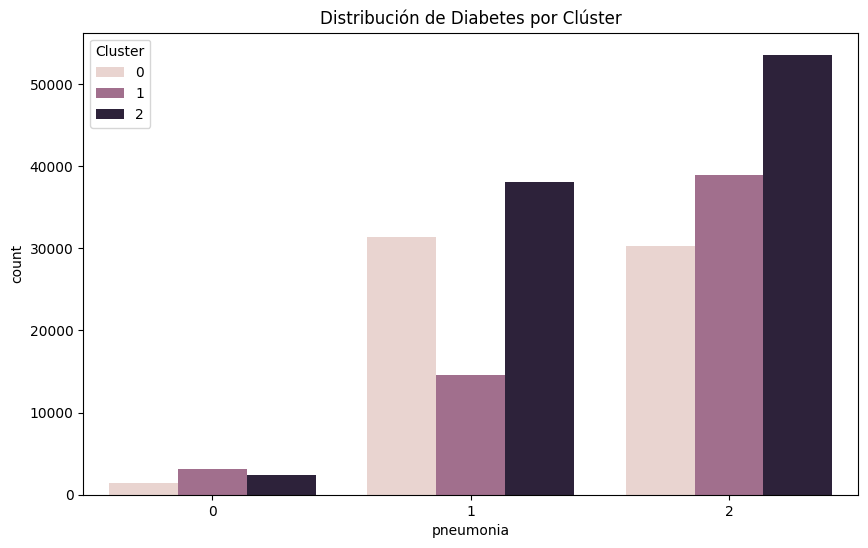

In [ ]:
# Ejemplo con `diabetes`
plt.figure(figsize=(10, 6))
sns.countplot(data=df1_numerico_copy, x='pneumonia', hue='Cluster')
plt.title('Distribución de Diabetes por Clúster')
plt.show()